In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows=None

In [3]:
pd.options.display.max_columns=None

#### Analyzing the population data 

In [4]:
#df = pd.read_csv('loan.csv')

In [5]:
#df.head(2)

In [6]:
#df['loan_status'].unique()

In [7]:
#df['issue_d']=pd.to_datetime(df['issue_d']) 

In [8]:
#df['Year']=df['issue_d'].dt.year

In [9]:
#df['Month']=df['issue_d'].dt.month

In [10]:
#pd.crosstab(df['Month'],df['Year'])

In [11]:
#sample_2018 = df[df['Year']==2018]

In [12]:
#sample_3m = sample_2018[(sample_2018['Month']==1) | (sample_2018['Month']==2) | (sample_2018['Month']==3)]

In [13]:
#sample_3m.shape

In [14]:
#sample_3m.to_csv('sample_3months.csv')

In [15]:
#sample_4m = sample_2018[sample_2018['Month'].isin([1,2,3,4])]

In [16]:
#sample_4m.shape

In [17]:
#sample_4m.to_csv('sample_4months.csv')

### Sample - 4months - 2018

In [18]:
df = pd.read_csv('sample_4months.csv')

In [19]:
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,343481,NaN,NaN,16000,16000,16000.0,36 months,18.45,582.06,D,D2,Manager,10+ years,RENT,85000.0,Source Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1.0,Sep-2006,1.0,20.0,NaN,15.0,0.0,1156,4.0,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,Feb-2019,582.06,Mar-2019,Feb-2019,1.0,20.0,1,Joint App,155000.0,25.71,Source Verified,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,2.0,27811.0,100.0,1.0,5.0,402.0,51.0,29200.0,2.0,4.0,2.0,9.0,7084.0,10763.0,7.2,0.0,0.0,137.0,139.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,0.0,1.0,3.0,96.0,0.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,38618.0,Mar-2007,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,343482,NaN,NaN,28675,28675,28675.0,60 months,26.77,871.67,E,E5,officer,10+ years,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0.0,Jul-2005,1.0,NaN,NaN,23.0,0.0,26933,69.4,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,Feb-2019,871.67,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,36.0,156597.0,116.0,2.0,4.0,10540.0,105.0,38800.0,0.0,1.0,1.0,4.0,23197.0,6014.0,79.5,0.0,0.0,153.0,128.0,2.0,2.0,2.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,0.0,2.0,100.0,75.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4


In [20]:
df.shape

(150792, 148)

In [21]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150792 entries, 0 to 150791
Data columns (total 148 columns):
Unnamed: 0                                    int64
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               float64
term                                          object
int_rate                                      float64
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                              

#### Checking the datatypes of each variable

In [22]:
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,343481,NaN,NaN,16000,16000,16000.0,36 months,18.45,582.06,D,D2,Manager,10+ years,RENT,85000.0,Source Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1.0,Sep-2006,1.0,20.0,NaN,15.0,0.0,1156,4.0,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,Feb-2019,582.06,Mar-2019,Feb-2019,1.0,20.0,1,Joint App,155000.0,25.71,Source Verified,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,2.0,27811.0,100.0,1.0,5.0,402.0,51.0,29200.0,2.0,4.0,2.0,9.0,7084.0,10763.0,7.2,0.0,0.0,137.0,139.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,0.0,1.0,3.0,96.0,0.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,38618.0,Mar-2007,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,343482,NaN,NaN,28675,28675,28675.0,60 months,26.77,871.67,E,E5,officer,10+ years,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0.0,Jul-2005,1.0,NaN,NaN,23.0,0.0,26933,69.4,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,Feb-2019,871.67,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,36.0,156597.0,116.0,2.0,4.0,10540.0,105.0,38800.0,0.0,1.0,1.0,4.0,23197.0,6014.0,79.5,0.0,0.0,153.0,128.0,2.0,2.0,2.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,0.0,2.0,100.0,75.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4


In [23]:
cols = pd.DataFrame(df.columns, columns=['Attributes'])
cols

,Attributes
0,Unnamed: 0
1,id
2,member_id
3,loan_amnt
4,funded_amnt
5,funded_amnt_inv
6,term
7,int_rate
8,installment
9,grade


In [24]:
#df = df.drop(['Year','Month'], axis=1)

In [25]:
df.shape

(150792, 148)

In [26]:
df['issue_d']= pd.to_datetime(df['issue_d'])
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d']= pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'])
df['sec_app_earliest_cr_line']= pd.to_datetime(df['sec_app_earliest_cr_line'])

In [27]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150792 entries, 0 to 150791
Data columns (total 148 columns):
Unnamed: 0                                    int64
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               float64
term                                          object
int_rate                                      float64
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                              

### Missing Value Treatment 

In [28]:
missing_value_percentage = df.isnull().sum().to_frame()/len(df)*100
missing_value_percentage =missing_value_percentage.rename({0:'Null Value Percentage'}, axis=1)
missing_value_percentage

,Null Value Percentage
Unnamed: 0,0.000000
id,100.000000
member_id,100.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000


In [29]:
null_greater_than_0 =missing_value_percentage[missing_value_percentage['Null Value Percentage'] > 0 ]

In [30]:
null_greater_than_0.sort_values(by='Null Value Percentage', ascending=False)

,Null Value Percentage
id,100.000000
url,100.000000
member_id,100.000000
desc,100.000000
orig_projected_additional_accrued_interest,99.868693
hardship_length,99.845483
payment_plan_start_date,99.845483
hardship_reason,99.845483
hardship_status,99.845483
deferral_term,99.845483


In [31]:
null_greater_than_0.shape

(62, 1)

In [32]:
df.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,343481,NaN,NaN,16000,16000,16000.0,36 months,18.45,582.06,D,D2,Manager,10+ years,RENT,85000.0,Source Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1.0,2006-09-01,1.0,20.0,NaN,15.0,0.0,1156,4.0,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,2019-02-01,582.06,2019-03-01,2019-02-01,1.0,20.0,1,Joint App,155000.0,25.71,Source Verified,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,2.0,27811.0,100.0,1.0,5.0,402.0,51.0,29200.0,2.0,4.0,2.0,9.0,7084.0,10763.0,7.2,0.0,0.0,137.0,139.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,0.0,1.0,3.0,96.0,0.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,38618.0,2007-03-01,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,343482,NaN,NaN,28675,28675,28675.0,60 months,26.77,871.67,E,E5,officer,10+ years,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0.0,2005-07-01,1.0,NaN,NaN,23.0,0.0,26933,69.4,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,2019-02-01,871.67,2019-03-01,2019-02-01,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,36.0,156597.0,116.0,2.0,4.0,10540.0,105.0,38800.0,0.0,1.0,1.0,4.0,23197.0,6014.0,79.5,0.0,0.0,153.0,128.0,2.0,2.0,2.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,0.0,2.0,100.0,75.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4


In [33]:
list(null_greater_than_0.index)

['id',
 'member_id',
 'emp_title',
 'emp_length',
 'url',
 'desc',
 'dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_rcnt_il',
 'il_util',
 'all_util',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_tl_120dpd_2m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'revol_bal_joint',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'har

## Data Cleaning for the variables with no null values 

In [34]:
no_null_values =missing_value_percentage[missing_value_percentage['Null Value Percentage']==0]

In [35]:
np_null_values_columns= list(no_null_values.index)

In [36]:
df_not_null = df.loc[:,np_null_values_columns]

In [37]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


In [38]:
df_not_null.shape

(150792, 86)

In [163]:
df_not_null.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'chargeoff

### Column/Attribute_1 : Unnamed:0

In [39]:
df.shape

(150792, 148)

In [40]:
df['Unnamed: 0'].nunique()

150792

In [41]:
df.set_index('Unnamed: 0', inplace=True)

In [42]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343481,NaN,NaN,16000,16000,16000.0,36 months,18.45,582.06,D,D2,Manager,10+ years,RENT,85000.0,Source Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1.0,2006-09-01,1.0,20.0,NaN,15.0,0.0,1156,4.0,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,2019-02-01,582.06,2019-03-01,2019-02-01,1.0,20.0,1,Joint App,155000.0,25.71,Source Verified,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,2.0,27811.0,100.0,1.0,5.0,402.0,51.0,29200.0,2.0,4.0,2.0,9.0,7084.0,10763.0,7.2,0.0,0.0,137.0,139.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,0.0,1.0,3.0,96.0,0.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,38618.0,2007-03-01,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
343482,NaN,NaN,28675,28675,28675.0,60 months,26.77,871.67,E,E5,officer,10+ years,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0.0,2005-07-01,1.0,NaN,NaN,23.0,0.0,26933,69.4,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,2019-02-01,871.67,2019-03-01,2019-02-01,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,36.0,156597.0,116.0,2.0,4.0,10540.0,105.0,38800.0,0.0,1.0,1.0,4.0,23197.0,6014.0,79.5,0.0,0.0,153.0,128.0,2.0,2.0,2.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,0.0,2.0,100.0,75.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Defining a fucntion for performing the univariate analysis of the numerical variables which have no missing values or null values 

In [43]:
def analyze_univariate_num(x):
    print(x.describe())
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_dist)
    plt.axvline(x.mean(), color='r')
    plt.axvline(x.median(),color='g')
    print("Skewness:",x.skew())
    print("Kurtosis:",x.kurt())
    print("Shapiro Result:", stats.shapiro(x))

### Column/Attribute_2 : loan_amnt

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces 
the loan amount, then it will be reflected in this value.

count    150792.000000
mean      16095.824712
std       10179.502959
min        1000.000000
25%        8000.000000
50%       14000.000000
75%       22000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
Skewness: 0.7519410576240981
Kurtosis: -0.33536692555177705
Shapiro Result: (0.9265623688697815, 0.0)


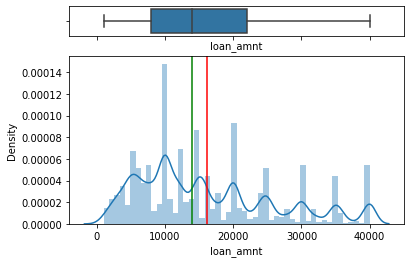

In [44]:
analyze_univariate_num(df['loan_amnt'])

Conclusion: 
    1. From the boxplot we can say that there are no outliers in the loan_amnt 
    2. There are multiple peaks so we can do transformation 
    3. The data also has to be scaled 
    4. From the shapiro Result we can say that the data is normal

### Column/Attribute_3 : funded_amnt

The total amount committed to that loan at that point in time.

count    150792.000000
mean      16095.824712
std       10179.502959
min        1000.000000
25%        8000.000000
50%       14000.000000
75%       22000.000000
max       40000.000000
Name: funded_amnt, dtype: float64
Skewness: 0.7519410576240981
Kurtosis: -0.33536692555177705
Shapiro Result: (0.9265623688697815, 0.0)


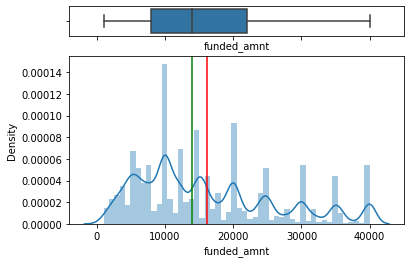

In [45]:
analyze_univariate_num(df['funded_amnt'])

Conclusion:
    1. Yet the definitions between both the above variables are different, in our sample study there are no  contrasting values.
    2. We can see from the above results there is no difference between the loan_amnt and funded_amnt.Thus we can 
    drop one of them

In [46]:
#df.drop('funded_amnt', axis=1)

### Column/Attribute_4: funded_amnt_inv

count    150792.000000
mean      16091.880701
std       10178.366105
min        1000.000000
25%        8000.000000
50%       14000.000000
75%       22000.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64
Skewness: 0.7520852301180017
Kurtosis: -0.3354493498984774
Shapiro Result: (0.9261890649795532, 0.0)


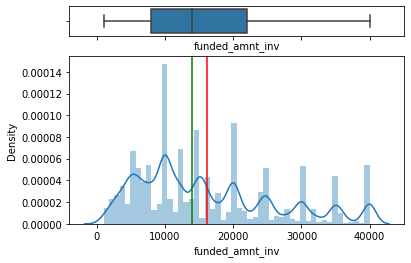

In [47]:
analyze_univariate_num(df['funded_amnt_inv'])

Conclusion:
    1. Neither this variable description is given in the data dictionary nor their values are different from the funded_amnt and loan_amnt so we can drop this vaiable

In [48]:
#df.drop('funded_amnt', axis=1)

#### Defining a fucntion for performing the univariate analysis of the categorical variables which have no missing values or null values 

In [49]:
def analyze_univariate_cat(x):
    print(x.value_counts(normalize=True))
    sns.countplot(x)
    plt.show()

### Column/Attribute_5: term 

The number of payments on the loan. Values are in months and can be either 36 or 60.

 36 months    0.69887
 60 months    0.30113
Name: term, dtype: float64


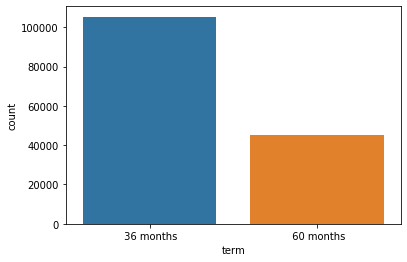

In [50]:
analyze_univariate_cat(df['term'])

Conclusion: 
    1. There is good percentage of values for both 36months and 60months, thus we cannot drop this variable
    2. We can get dummies for this variable

### Column/Attribute_6: int_rate

The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off. There is another variable for effective interest rate as given in DataDictionary

count    150792.000000
mean         12.455130
std           5.028557
min           5.310000
25%           9.430000
50%          11.980000
75%          15.050000
max          30.990000
Name: int_rate, dtype: float64
Skewness: 0.8606157071452561
Kurtosis: 0.5741871241572105
Shapiro Result: (0.9426144361495972, 0.0)


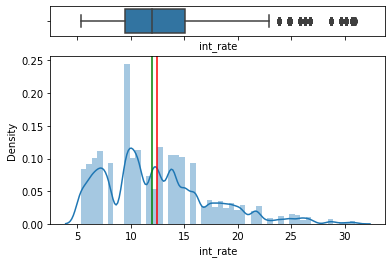

In [51]:
analyze_univariate_num(df['int_rate'])

Conclusion:
    1. Outliers can be removed using transformation
    2. Data is not normal from shapiro's result 
    3. Data is moderately skewed and positively skewed 
    4. LeptoKurtic distribution

### Column/Attribute_7:Installment 

The monthly payment owed by the borrower if the loan originates.

count    150792.000000
mean        468.076601
std         288.642302
min          29.760000
25%         254.000000
50%         386.840000
75%         635.660000
max        1628.080000
Name: installment, dtype: float64
Skewness: 0.9283743045688089
Kurtosis: 0.27568191450243207
Shapiro Result: (0.9271407127380371, 0.0)


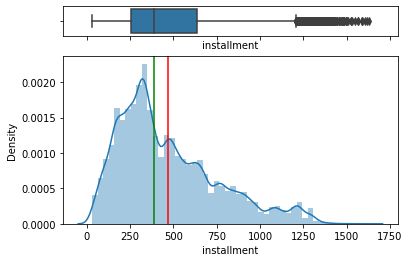

In [52]:
analyze_univariate_num(df['installment'])

Conclusion:
    1. The Upper bound has to be increased inorder to include all the outliers 
    2. Data is not normal from shapiro's result
    3. Positively skewness or right skewness 
    4. Leptokurtic Distribution
    5. We can use transformation to make it normal

### column/Attribute_8: grade

LC assigned loan grade

A Letter of Credit (LC) is a document that guarantees the buyer’s payment to the sellers. It is issued by a bank and ensures timely and full payment to the seller. If the buyer is unable to make such a payment, the bank covers the full or the remaining amount on behalf of the buyer.

Lending Club’s interest rates take into account credit risk and market conditions. The final interest rate for each loan grade is the result of the following equation:

Lending Club Base Rate + Adjustment for Risk & Volatility

The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5.

The loan grade is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report and loan application. All loans have either a 36- or 60-month term, with fixed interest rates and equal payments.

In [53]:
Grade_SubGrade = pd.read_excel('grade_subGrade.xlsx')

In [54]:
Grade_SubGrade

,LOAN GRADE,SUB-GRADE,LENDING CLUB BASE RATE,ADJUSTMENT FOR RISK & VOLATILITY,INTEREST RATE
0,A,1,0.0505,0.0341,0.0846
1,NaN,2,0.0505,0.0397,0.0902
2,NaN,3,0.0505,0.0451,0.0956
3,NaN,4,0.0505,0.0514,0.1019
4,NaN,5,0.0505,0.0576,0.1081
5,B,1,0.0505,0.0828,0.1333
6,NaN,2,0.0505,0.0897,0.1402
7,NaN,3,0.0505,0.0966,0.1471
8,NaN,4,0.0505,0.1035,0.1540
9,NaN,5,0.0505,0.1103,0.1608


B    0.300241
C    0.268542
A    0.246545
D    0.142992
E    0.034040
F    0.006472
G    0.001167
Name: grade, dtype: float64


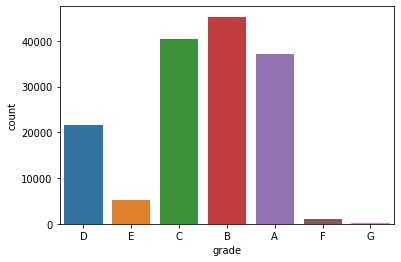

In [55]:
analyze_univariate_cat(df['grade'])

Conclusion:
    1. As there are numerical values we can actually replace them with it.(Had to confirm with Sir)

### column/Attribute_9: sub_grade

B5    0.065023
B1    0.063538
B2    0.062231
C1    0.060812
B4    0.057888
A4    0.057304
C2    0.053816
C3    0.053816
C4    0.052271
A3    0.051860
B3    0.051561
A5    0.047967
C5    0.047827
A2    0.046627
A1    0.042787
D1    0.032343
D2    0.030804
D3    0.029299
D4    0.026109
D5    0.024438
E5    0.008542
E3    0.007938
E4    0.006784
E2    0.006400
E1    0.004377
F1    0.003840
G1    0.001021
F2    0.000749
F3    0.000736
F5    0.000584
F4    0.000564
G2    0.000060
G4    0.000040
G3    0.000033
G5    0.000013
Name: sub_grade, dtype: float64


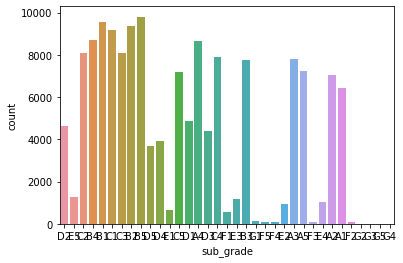

In [56]:
analyze_univariate_cat(df['sub_grade'])

Conclusion:
    1. Instead of Grade, we can use subgrade as there is furthur division is happening here and the Grade variable can be dropped

### Column/Attribute_10: Annual_inc

The self-reported annual income provided by the borrower during registration.

count    1.507920e+05
mean     7.858652e+04
std      8.013942e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      9.930475e+06
Name: annual_inc, dtype: float64
Skewness: 48.017853354712095
Kurtosis: 4745.784693082272
Shapiro Result: (0.38317781686782837, 0.0)


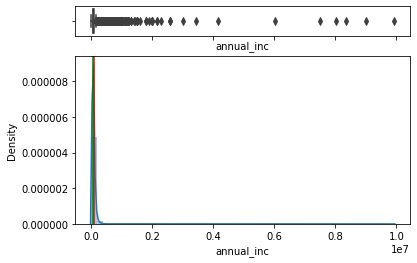

In [57]:
analyze_univariate_num(df['annual_inc'])

Conclusion:
    1. This variable has to be scaled as they are really huge values 
    2. Data is not normal
    3. More conclusions can be seen only when it is scaled 

### Column/Attribute_11: verification_status

Whether the loan is verified or not

Source Verified    0.390253
Not Verified       0.382766
Verified           0.226982
Name: verification_status, dtype: float64


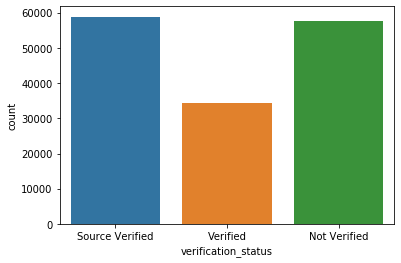

In [58]:
analyze_univariate_cat(df['verification_status'])

Conclusion:
    1. Good percentage of different variables so we can get dummies for this variable.

#### Defining a fucntion for performing the univariate analysis of the datetime variables which have no missing values or null values 

In [59]:
def analyze_univariate_dt(x):
    print(x.describe())

### Column/Attribute_12: issue_d

The date the loan is issued to the borrower 

In [60]:
analyze_univariate_dt(df['issue_d'])

count                  150792
unique                      4
top       2018-04-01 00:00:00
freq                    42928
first     2018-01-01 00:00:00
last      2018-04-01 00:00:00
Name: issue_d, dtype: object


Conclusion:
    1. Should we tranform the date variables by taking the cuttoff date and calculate from that ?
    2. How should we include the date variables in the dataset 
    3. As we are taking only three months data , this variable doesnot hold much importance so we can drop this variable

### Column/Attribute_13: loan_status

When you look at the Notes in your account you will notice that each one has a status listed. This refers to the status of the loan that corresponds to each Note.The definitions of each status are below. 
 
Current: Loan is up to date on all outstanding payments. (1)
 
In Grace Period: Loan is past due but within the 15-day grace period. (0)
 
Late (16-30): Loan has not been current for 16 to 30 days. Learn more about the tools LendingClub has to deal with delinquent borrowers.(0)
 
Late (31-120): Loan has not been current for 31 to 120 days. Learn more about the tools LendingClub has to deal with delinquent borrowers.(0)
 
Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.(1)
 
Default: Loan has not been current for an extended period of time. Learn more about the difference between “default” and “charge off”.(0)
 
Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between “default” and “charge off”.(0)

Current               0.798020
Fully Paid            0.140306
Charged Off           0.032124
Late (31-120 days)    0.019431
In Grace Period       0.006705
Late (16-30 days)     0.003382
Default               0.000033
Name: loan_status, dtype: float64


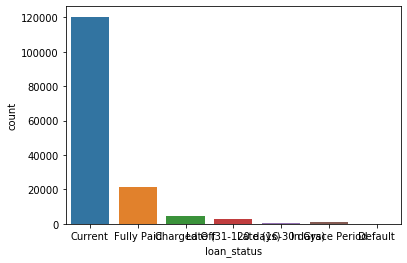

In [61]:
analyze_univariate_cat(df['loan_status'])

Conclusion: 
    1. This is the target variable 
    2. We have to decide how to group them differently

### Column/Attribute_14: pymnt_plan

n    0.99933
y    0.00067
Name: pymnt_plan, dtype: float64


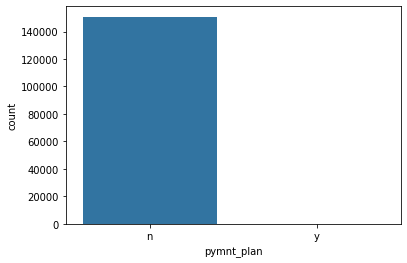

In [62]:
analyze_univariate_cat(df['pymnt_plan'])

Conclusion:
    1. There is a low percentage of y compared to the sample size, thus we can drop this variable

### Column/Attribute_15: title

The job title supplied by the Borrower when applying for the loan.

Debt consolidation         0.505173
Credit card refinancing    0.229873
Other                      0.091450
Home improvement           0.072922
Major purchase             0.029730
Medical expenses           0.016327
Home buying                0.015684
Car financing              0.012434
Business                   0.011784
Vacation                   0.007229
Moving and relocation      0.006831
Green loan                 0.000564
Name: title, dtype: float64


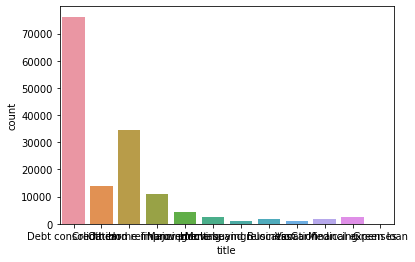

In [63]:
analyze_univariate_cat(df['title'])

Conclusion:
    1. Good percentage of distribution ,we cannot drop this variable, but we can group some lower percenatge level variables

### Column/Attribute_16: Zip_code

The first 3 numbers of the zip code provided by the borrower in the loan application.

112xx    0.010776
945xx    0.010511
750xx    0.010166
300xx    0.009052
606xx    0.008966
331xx    0.008701
891xx    0.008270
070xx    0.007872
770xx    0.007666
104xx    0.007341
330xx    0.007202
117xx    0.007102
900xx    0.006950
100xx    0.006844
917xx    0.006645
852xx    0.006108
925xx    0.005809
334xx    0.005637
604xx    0.005518
926xx    0.005478
853xx    0.005471
913xx    0.005352
601xx    0.005252
207xx    0.005239
600xx    0.005226
760xx    0.005186
921xx    0.005073
956xx    0.005047
481xx    0.004967
301xx    0.004954
113xx    0.004848
802xx    0.004775
773xx    0.004675
021xx    0.004649
080xx    0.004616
920xx    0.004556
782xx    0.004543
980xx    0.004450
774xx    0.004423
928xx    0.004284
923xx    0.004277
114xx    0.004271
850xx    0.004264
800xx    0.004078
302xx    0.004052
786xx    0.004025
953xx    0.003966
480xx    0.003926
201xx    0.003899
275xx    0.003866
327xx    0.003846
951xx    0.003846
553xx    0.003840
902xx    0.003754
212xx    0.003754
088xx    0

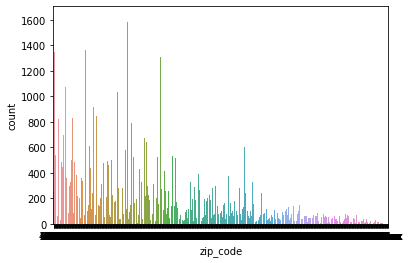

In [64]:
analyze_univariate_cat(df['zip_code'])

Conclusion:
    1. We can either has to find a way to keep such variables in the model 
    2. We can only visualize using tableau
    3. Check its impact with target variable

### Column/Attribute_17: addr_state

The state provided by the borrower in the loan application

CA    0.135180
TX    0.082876
NY    0.079964
FL    0.072995
IL    0.039432
NJ    0.035373
GA    0.033158
OH    0.031925
PA    0.031766
NC    0.028523
VA    0.026056
MI    0.025558
MD    0.024152
AZ    0.023675
CO    0.023151
MA    0.022833
WA    0.021248
IN    0.017746
MN    0.017335
TN    0.016891
MO    0.016122
CT    0.016108
NV    0.015412
WI    0.013323
SC    0.013270
OR    0.012527
AL    0.011579
LA    0.010253
KY    0.009238
OK    0.009006
KS    0.007912
AR    0.007434
MS    0.006532
UT    0.006519
WV    0.006174
NM    0.005166
NH    0.005073
NE    0.004748
RI    0.004503
HI    0.003780
ID    0.003389
ME    0.003177
MT    0.002991
DE    0.002759
AK    0.002487
VT    0.002454
ND    0.002162
WY    0.002142
SD    0.002076
DC    0.001850
Name: addr_state, dtype: float64


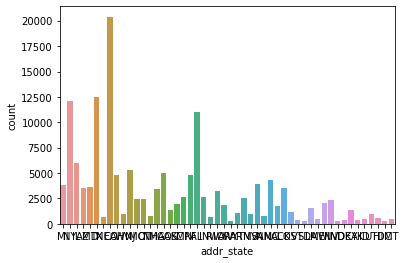

In [65]:
analyze_univariate_cat(df['addr_state'])

### Column/Attribute_18: delinq_2yrs

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years, Delinquency means that you are behind on payments. Once you are delinquent for a certain period of time (usually nine months for federal loans), your lender will declare the loan to be in default. The entire loan balance will become due at that time.

count    150792.000000
mean          0.227101
std           0.734137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: delinq_2yrs, dtype: float64
Skewness: 6.5927757217425205
Kurtosis: 76.13091051615905
Shapiro Result: (0.3382307291030884, 0.0)


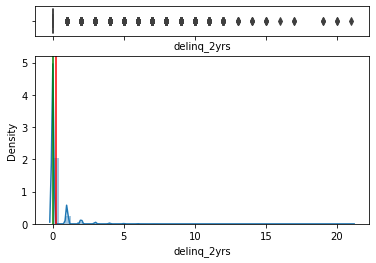

In [66]:
analyze_univariate_num(df['delinq_2yrs'])

Conclusion: 
    1. Converting into two classes of the variable

0.0     0.854780
1.0     0.102366
2.0     0.025485
3.0     0.008800
4.0     0.004032
5.0     0.001771
6.0     0.000922
7.0     0.000557
8.0     0.000345
9.0     0.000292
10.0    0.000285
11.0    0.000139
12.0    0.000106
13.0    0.000027
15.0    0.000020
14.0    0.000020
20.0    0.000013
17.0    0.000013
19.0    0.000013
21.0    0.000007
16.0    0.000007
Name: delinq_2yrs, dtype: float64


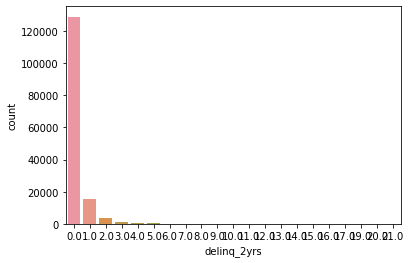

In [165]:
analyze_univariate_cat(df['delinq_2yrs'])

### Column/Attribute_19: earliest_cr_line

The date the borrower's earliest reported credit line was opened

In [67]:
analyze_univariate_dt(df['earliest_cr_line'])

count                  150792
unique                    649
top       2006-08-01 00:00:00
freq                     1230
first     1950-01-01 00:00:00
last      2015-03-01 00:00:00
Name: earliest_cr_line, dtype: object


Conclusion:
    1. Date Variable ?

### Column/Attribute_20: inq_last_6mnths

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

count    150792.000000
mean          0.461424
std           0.744318
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: inq_last_6mths, dtype: float64
Skewness: 1.684893940638173
Kurtosis: 2.605166182241806
Shapiro Result: (0.6531473398208618, 0.0)


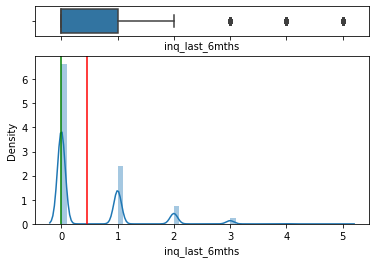

In [68]:
analyze_univariate_num(df['inq_last_6mths'])

0.0    0.663324
1.0    0.237917
2.0    0.074454
3.0    0.022946
4.0    0.001035
5.0    0.000325
Name: inq_last_6mths, dtype: float64


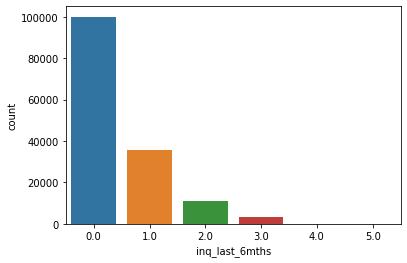

In [166]:
analyze_univariate_cat(df['inq_last_6mths'])

Conclusion:
    1. We can drop this variable, because majority of the classes are not included 

### Column/Attribute_21: open_acc

open_acc --The number of open credit lines in the borrower's credit file.An open credit is a financial arrangement between a lender and a borrower that allows the latter to access credit repeatedly up to a specific maximum limit. Once the borrower starts making repayments to the account,the money becomes available for withdrawal again since it is a revolving fund.


count    150792.000000
mean         11.429910
std           5.921839
min           0.000000
25%           7.000000
50%          10.000000
75%          14.000000
max          72.000000
Name: open_acc, dtype: float64
Skewness: 1.2877440901683987
Kurtosis: 3.036410256165821
Shapiro Result: (0.9220698475837708, 0.0)


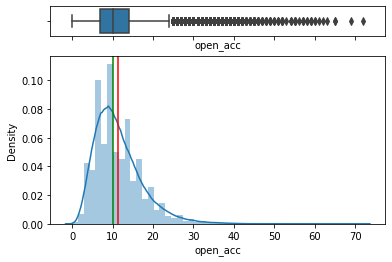

In [69]:
analyze_univariate_num(df['open_acc'])

Conclusion:
    1. Data is normal
    2. Heavy no.of outliers , positively skewed 
    3. Leptokurtic distribution

### Column/Attribute_22: pub_rec

Number of derogatory public records, A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

count    150792.000000
mean          0.157992
std           0.476058
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: pub_rec, dtype: float64
Skewness: 14.193581871948515
Kurtosis: 1038.4679294082437
Shapiro Result: (0.3404691219329834, 0.0)


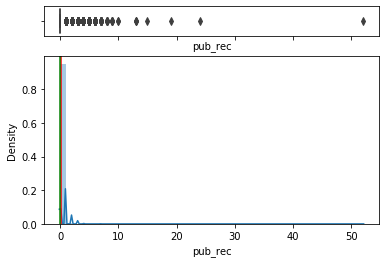

In [70]:
analyze_univariate_num(df['pub_rec'])

In [71]:
df['pub_rec'].value_counts(normalize=True)

0.0     0.861916
1.0     0.126545
2.0     0.007381
3.0     0.002341
4.0     0.000955
5.0     0.000418
6.0     0.000186
7.0     0.000113
8.0     0.000046
9.0     0.000040
13.0    0.000020
10.0    0.000013
24.0    0.000007
15.0    0.000007
52.0    0.000007
19.0    0.000007
Name: pub_rec, dtype: float64

Conclusion:
    1. 86% of the values are 0 so check this variable's correaltion with the target variable and take a decision to drop it or not

### Column/Attribute_23: total_cu_tl

Number of finance trades, Trade finance represents the financial instruments and products that are used by companies to facilitate international trade and commerce. Trade finance makes it possible and easier for importers and exporters to transact business through trade. Trade finance is an umbrella term meaning it covers many financial products that banks and companies utilize to make trade transactions feasible.

count    150792.000000
mean          1.455356
std           2.632461
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          52.000000
Name: total_cu_tl, dtype: float64
Skewness: 3.416134864261843
Kurtosis: 18.55625477673638
Shapiro Result: (0.6021996736526489, 0.0)


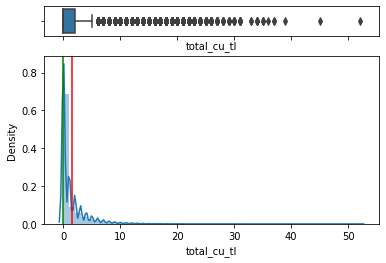

In [72]:
analyze_univariate_num(df['total_cu_tl'])

0.0     0.541713
1.0     0.170201
2.0     0.092916
3.0     0.058929
4.0     0.038981
5.0     0.027097
6.0     0.018854
7.0     0.013489
8.0     0.009702
9.0     0.006950
10.0    0.004861
11.0    0.004105
12.0    0.002825
13.0    0.002175
14.0    0.001598
15.0    0.001253
16.0    0.000915
17.0    0.000802
18.0    0.000550
19.0    0.000371
20.0    0.000358
21.0    0.000272
22.0    0.000206
23.0    0.000159
24.0    0.000153
26.0    0.000119
25.0    0.000099
27.0    0.000073
31.0    0.000053
30.0    0.000040
29.0    0.000040
28.0    0.000040
34.0    0.000027
35.0    0.000020
33.0    0.000013
37.0    0.000013
45.0    0.000007
36.0    0.000007
39.0    0.000007
52.0    0.000007
Name: total_cu_tl, dtype: float64


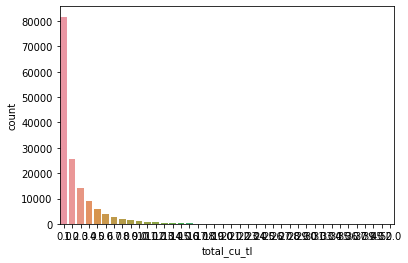

In [167]:
analyze_univariate_cat(df['total_cu_tl'])

### Column/Attribute_24: revol_bal

Total credit revolving balance, Revolving credit is an agreement that permits an account holder to borrow money repeatedly up to a set dollar limit while repaying a portion of the current balance due in regular payments. Each payment, minus the interest and fees charged, replenishes the amount available to the account holder.Credit cards and lines of credit both work on the principle of revolving credit.

count    1.507920e+05
mean     1.603601e+04
std      2.271126e+04
min      0.000000e+00
25%      5.091750e+03
50%      1.060500e+04
75%      1.951325e+04
max      1.470945e+06
Name: revol_bal, dtype: float64
Skewness: 10.813290957250771
Kurtosis: 329.3286498106263
Shapiro Result: (0.507481575012207, 0.0)


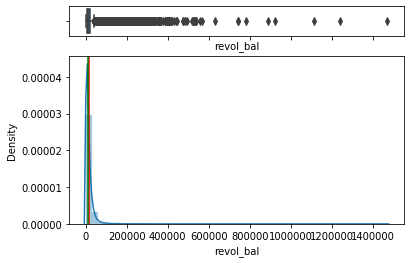

In [73]:
analyze_univariate_num(df['revol_bal'])

Conclusion:
    1. This variable has to be scaled down using transformation or scaling

### Column/Attribute_25: total_acc

The total number of credit lines currently in the borrower's credit file

count    150792.000000
mean         22.631227
std          12.058127
min           2.000000
25%          14.000000
50%          21.000000
75%          29.000000
max         153.000000
Name: total_acc, dtype: float64
Skewness: 1.1147427488437012
Kurtosis: 2.2090210343299974
Shapiro Result: (0.9377496242523193, 0.0)


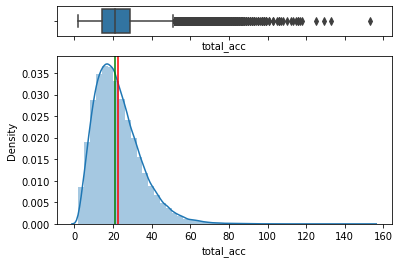

In [74]:
analyze_univariate_num(df['total_acc'])

Conclusion:
    1. Positively skewed 
    2. Data is not normal
    3. Heavy no.of outliers but not huge values 

### Column/Attribute_26: initial_list_status

The initial listing status of the loan. Possible values are – W, F. Initial List Status of Loan
Lending Club reserves a few loans for 12 hours and offers them to the institutional and large retail lenders who want to lend the whole amount for a loan. I am not sure whether the historical loan data file includes the loans that were offered and picked up by lenders as 'whole' loans. But, the loans that were initially offered as whole, designated with 'w', but not picked up as 'whole' loans are listed in historical loan data file.

The chart below shows the percentage of loans with verified and unverified income of borrowers with initial listing status and issued year of the loans. Lending Club started offering the 'whole' loans only since late 2012. With the limited data, there doesn't appear to be any significant difference in percentage of loans with verified income between the loans that were initially offered as whole or fractional 'f'.


w    0.831622
f    0.168378
Name: initial_list_status, dtype: float64


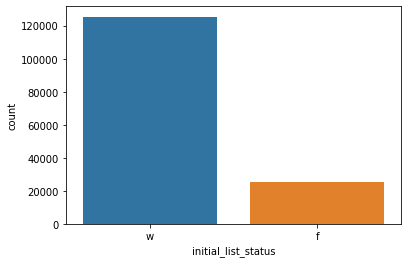

In [75]:
analyze_univariate_cat(df['initial_list_status'])

Conclusion:
    1. If this variable does not have any correlation with the target variable we can drop this variable as 86% of the data is 'W'

### Column/Attribute_27: out_prncp

Remaining outstanding principal for total amount funded, The actual loan amount that gets disbursed is called principal account. As you pay the EMIs, the loan amount gets depleted. The actual outstanding after adjusting the regular EMIs will get termed as total outstanding.

count    150792.000000
mean      10374.497552
std        8939.370783
min           0.000000
25%        3370.970000
50%        8418.665000
75%       15784.680000
max       38055.940000
Name: out_prncp, dtype: float64
Skewness: 0.7910333507452744
Kurtosis: -0.18207828734757436
Shapiro Result: (0.9175838232040405, 0.0)


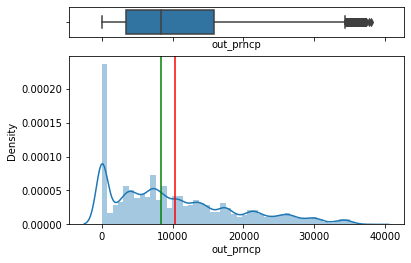

In [76]:
analyze_univariate_num(df['out_prncp'])

Conclusion:
    1. Data is not normal
    2. Negatively Skewed data 
    3. Platykurtic distribution

### Column/Attribute_28:out_prncp_inv

Remaining outstanding principal for portion of total amount funded by investors

count    150792.000000
mean      10372.156523
std        8938.491420
min           0.000000
25%        3370.970000
50%        8411.640000
75%       15783.617500
max       38055.940000
Name: out_prncp_inv, dtype: float64
Skewness: 0.7913964002149462
Kurtosis: -0.1814190897969934
Shapiro Result: (0.9175314903259277, 0.0)


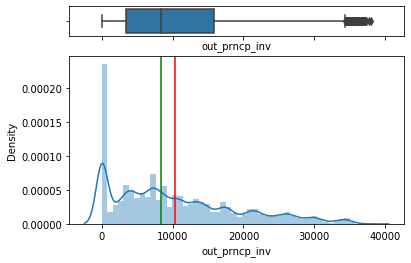

In [77]:
analyze_univariate_num(df['out_prncp_inv'])

Conclusion:
    1. As there is no difference between this one and previous, we shall keep only one variable

### Column/Attribute_29: total_pymnt

Payments received to date for total amount funded. 

count    150792.000000
mean       6779.175168
std        6289.429453
min           0.000000
25%        3023.770000
50%        4958.780000
75%        8360.750000
max       51653.389338
Name: total_pymnt, dtype: float64
Skewness: 2.735106894842325
Kurtosis: 9.659036267009078
Shapiro Result: (0.729255199432373, 0.0)


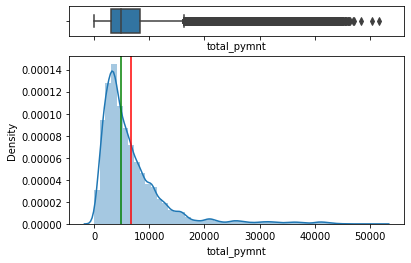

In [78]:
analyze_univariate_num(df['total_pymnt'])

### Column/Attribute_30: total_pymnt_inv

Payments received to date for portion of total amount funded by investors

count    150792.000000
mean       6777.343195
std        6288.188691
min           0.000000
25%        3022.975000
50%        4956.100000
75%        8358.900000
max       51653.390000
Name: total_pymnt_inv, dtype: float64
Skewness: 2.735487212252421
Kurtosis: 9.661586645747231
Shapiro Result: (0.7291980981826782, 0.0)


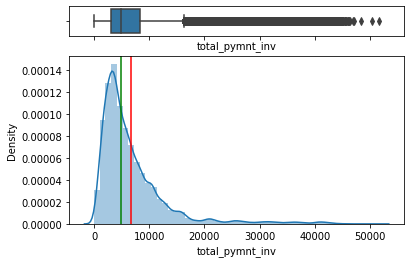

In [79]:
analyze_univariate_num(df['total_pymnt_inv'])

Conclusion:
    1. Keep any one of the variable as they are same values 

### Column/Attribute_31: total_rec_prncp

Principal received to date

count    150792.000000
mean       5212.331878
std        5987.169953
min           0.000000
25%        1942.902500
50%        3241.800000
75%        5874.252500
max       40000.000000
Name: total_rec_prncp, dtype: float64
Skewness: 3.105578474147294
Kurtosis: 11.49064129889448
Shapiro Result: (0.6477295160293579, 0.0)


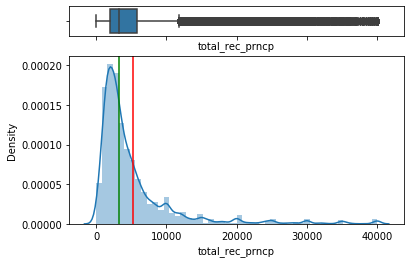

In [80]:
analyze_univariate_num(df['total_rec_prncp'])

Conclusion:
    1. Looks like it is the same variable as above but their values are different

### Column/Attribute_32:total_rec_int

Interest received to date

count    150792.000000
mean       1551.909275
std        1333.470683
min           0.000000
25%         567.817500
50%        1150.610000
75%        2159.130000
max       11871.990000
Name: total_rec_int, dtype: float64
Skewness: 1.547304417951791
Kurtosis: 3.0080700852068283
Shapiro Result: (0.8625310063362122, 0.0)


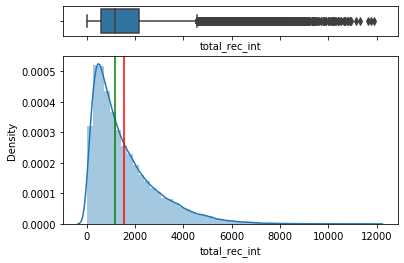

In [81]:
analyze_univariate_num(df['total_rec_int'])

Conclusion:
    1. They all look similar distributions but their meanings and values are different 
    

#### total_pymnt = total_rec_prncp + total_rec_int

### Column/Attribute_33: total_rec_late_fee

Late fees received to date

count    150792.000000
mean          0.819475
std           7.773280
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         404.530000
Name: total_rec_late_fee, dtype: float64
Skewness: 18.527849819058858
Kurtosis: 529.2536194654734
Shapiro Result: (0.08117860555648804, 0.0)


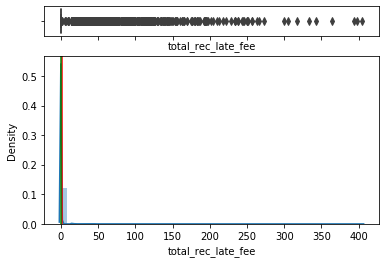

In [82]:
analyze_univariate_num(df['total_rec_late_fee'])

In [83]:
df['total_rec_late_fee'].value_counts(normalize=True)

0.000000      0.978765
15.000000     0.005093
30.000000     0.001147
45.000000     0.000351
60.000000     0.000146
16.230000     0.000086
16.990000     0.000080
17.580000     0.000073
16.610000     0.000066
16.600000     0.000066
16.000000     0.000066
17.110000     0.000066
34.690000     0.000060
17.860000     0.000060
24.520000     0.000060
16.350000     0.000060
17.340000     0.000053
90.000000     0.000053
15.520000     0.000053
64.920000     0.000053
23.310000     0.000053
31.320000     0.000053
16.750000     0.000046
16.120000     0.000046
33.210000     0.000046
44.750000     0.000046
18.190000     0.000046
32.700000     0.000046
28.190000     0.000046
54.570000     0.000046
22.550000     0.000040
16.680000     0.000040
16.920000     0.000040
45.600000     0.000040
20.530000     0.000040
60.700000     0.000040
16.760000     0.000040
35.160000     0.000040
34.220000     0.000040
19.340000     0.000040
75.000000     0.000033
24.900000     0.000033
15.060000     0.000033
46.610000  

Conclusion:
    1. 97% of the values are zeroes so we can drop this variable or check for the correlation with the target variable and then make a decision
    

### Column/Attribute_34: recoveries

post charge off gross recovery

count    150792.000000
mean         14.114544
std         239.787955
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33122.070000
Name: recoveries, dtype: float64
Skewness: 35.08826211709275
Kurtosis: 2888.3493995579756
Shapiro Result: (0.03268951177597046, 0.0)


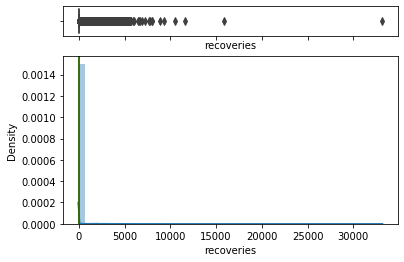

In [84]:
analyze_univariate_num(df['recoveries'])

In [85]:
df['recoveries'].value_counts(normalize=True)

0.00        0.993654
25.00       0.000199
50.00       0.000159
100.00      0.000119
75.00       0.000060
200.00      0.000046
250.00      0.000040
400.00      0.000033
300.00      0.000027
150.00      0.000027
827.36      0.000020
125.00      0.000020
4254.99     0.000013
10.00       0.000013
824.32      0.000013
4691.62     0.000013
2203.15     0.000013
2705.82     0.000013
2835.24     0.000013
800.00      0.000013
4769.18     0.000013
1371.10     0.000013
2497.27     0.000007
301.88      0.000007
1039.40     0.000007
4780.75     0.000007
650.34      0.000007
765.85      0.000007
3451.21     0.000007
3307.93     0.000007
1497.11     0.000007
5240.78     0.000007
6902.83     0.000007
2176.94     0.000007
803.89      0.000007
1382.56     0.000007
614.29      0.000007
1605.97     0.000007
4651.84     0.000007
1902.19     0.000007
5219.53     0.000007
2007.89     0.000007
4702.16     0.000007
4359.37     0.000007
1484.70     0.000007
4607.12     0.000007
4877.82     0.000007
1498.39     0

Conclusion:
    1. 99.3% of the values are 0 , we can drop this variable

### Column/Attribute_35: collection_recovery_fee

count    150792.000000
mean          2.479767
std          42.652342
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5961.972600
Name: collection_recovery_fee, dtype: float64
Skewness: 36.001759480280995
Kurtosis: 3024.269977059753
Shapiro Result: (0.032047390937805176, 0.0)


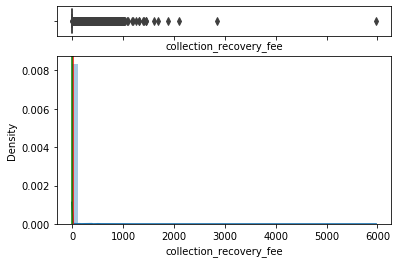

In [86]:
analyze_univariate_num(df['collection_recovery_fee'])

In [87]:
df['collection_recovery_fee'].value_counts(normalize=True)

0.0000       0.993654
4.5000       0.000153
9.0000       0.000133
18.0000      0.000113
36.0000      0.000046
13.5000      0.000046
72.0000      0.000033
45.0000      0.000033
27.0000      0.000027
54.0000      0.000027
148.9248     0.000020
858.4524     0.000013
765.8982     0.000013
396.5670     0.000013
510.3432     0.000013
487.0476     0.000013
246.7980     0.000013
22.5000      0.000013
148.3776     0.000013
844.4916     0.000013
183.5478     0.000007
144.7002     0.000007
56.1114      0.000007
22.9167      0.000007
895.8564     0.000007
386.0298     0.000007
939.5154     0.000007
242.5734     0.000007
45.0000      0.000007
437.1354     0.000007
340.9452     0.000007
659.3022     0.000007
852.3342     0.000007
319.6476     0.000007
382.5774     0.000007
1089.7200    0.000007
71.8164      0.000007
837.3312     0.000007
293.0130     0.000007
315.5022     0.000007
350.0514     0.000007
67.4721      0.000007
818.8146     0.000007
281.7108     0.000007
607.5000     0.000007
167.9832  

Conclusion:
    This is same as the previous variable , can be dropped or can be categorised into 0 and 1 

### Column/Attribute_36: last_pymnt_amnt

In [168]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


Last total payment amount received

count    150792.000000
mean       2110.311944
std        5446.093629
min           0.000000
25%         276.170000
50%         461.240000
75%         817.410000
max       41353.670000
Name: last_pymnt_amnt, dtype: float64
Skewness: 4.07013063240359
Kurtosis: 17.79043048565854
Shapiro Result: (0.3855183720588684, 0.0)


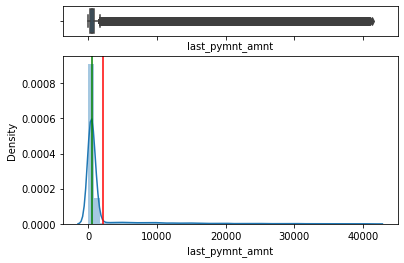

In [88]:
analyze_univariate_num(df['last_pymnt_amnt'])

In [89]:
df['last_pymnt_amnt'].value_counts(normalize=True)

320.010000      0.002958
332.050000      0.002785
307.450000      0.002726
304.540000      0.002712
301.110000      0.002699
313.180000      0.002666
326.920000      0.002553
310.330000      0.002487
324.610000      0.002427
335.070000      0.002261
320.050000      0.002241
322.300000      0.002235
307.500000      0.002102
339.740000      0.002016
313.230000      0.001950
342.120000      0.001817
1204.420000     0.001810
310.380000      0.001797
304.590000      0.001764
602.210000      0.001691
332.100000      0.001691
322.350000      0.001678
346.850000      0.001671
324.650000      0.001638
326.970000      0.001585
301.150000      0.001572
163.460000      0.001545
351.620000      0.001505
0.000000        0.001492
614.900000      0.001485
461.180000      0.001479
609.080000      0.001472
335.120000      0.001459
451.660000      0.001459
166.030000      0.001452
160.010000      0.001419
155.170000      0.001413
640.010000      0.001399
465.500000      0.001386
653.830000      0.001366


Conclusion: 
    1. Should be scaled down as more no.of values less than 1000

### Column/Attribute_37: collections_12_mths_ex_med

Number of collections in 12 months excluding medical collections

count    150792.000000
mean          0.016884
std           0.143544
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: collections_12_mths_ex_med, dtype: float64
Skewness: 11.260213190863082
Kurtosis: 211.59249377180424
Shapiro Result: (0.09336155652999878, 0.0)


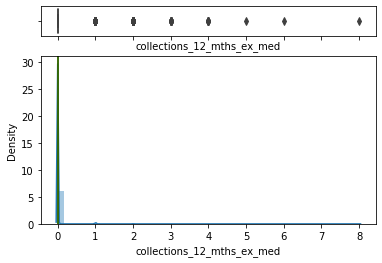

In [90]:
analyze_univariate_num(df['collections_12_mths_ex_med'])

In [91]:
df['collections_12_mths_ex_med'].value_counts(normalize=True)

0.0    0.984595
1.0    0.014232
2.0    0.000995
3.0    0.000099
4.0    0.000060
8.0    0.000007
5.0    0.000007
6.0    0.000007
Name: collections_12_mths_ex_med, dtype: float64

Conclusion:
    1. 98% of the values are 0 and thus we can drop this variable or we can form two categories 

### Column/Attribute_38:policy_code 

count    150792.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: policy_code, dtype: float64
Skewness: 0
Kurtosis: 0
Shapiro Result: (1.0, 1.0)


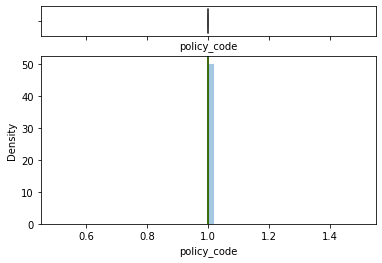

In [92]:
analyze_univariate_num(df['policy_code'])

In [93]:
df['policy_code'].value_counts()

1    150792
Name: policy_code, dtype: int64

Conclusion:
    1. we can drop this variable as all the values are 1 

### Column/Attribute_39: application_type

Indicates whether the loan is an individual application or a joint application with two co-borrowers

Individual    0.851192
Joint App     0.148808
Name: application_type, dtype: float64


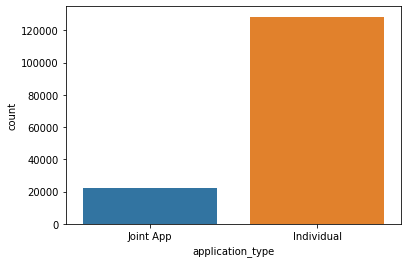

In [94]:
analyze_univariate_cat(df['application_type'])

Conclusion:
    1. We can get dummies for this variable as there is only two classes in this variable

### Column/Attribute_40: acc_now_delinq

The number of accounts on which the borrower is now delinquent.

count    150792.000000
mean          0.000172
std           0.013130
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: acc_now_delinq, dtype: float64
Skewness: 76.13677040115651
Kurtosis: 5794.884666429977
Shapiro Result: (0.0025272369384765625, 0.0)


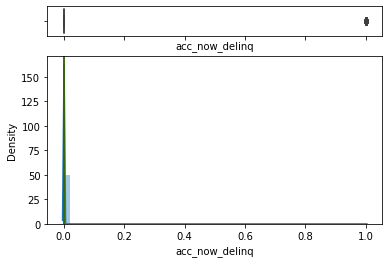

In [95]:
analyze_univariate_num(df['acc_now_delinq'])

In [96]:
df['acc_now_delinq'].value_counts(normalize=True)

0.0    0.999828
1.0    0.000172
Name: acc_now_delinq, dtype: float64

Conclusion:
    1. We can drop this variable or make two classes of the categorical variable

### Column/Attribute_41: tot_coll_amt

Total collection amounts ever owed

count    1.507920e+05
mean     2.654356e+02
std      2.100260e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.214661e+06
Name: tot_coll_amt, dtype: float64
Skewness: 275.51586880965397
Kurtosis: 76765.33246309457
Shapiro Result: (0.0014427900314331055, 0.0)


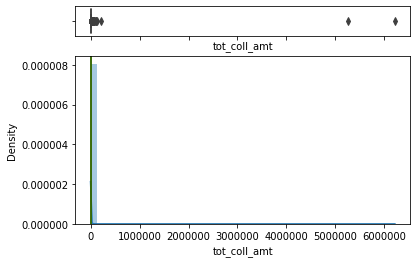

In [97]:
analyze_univariate_num(df['tot_coll_amt'])

In [98]:
df['tot_coll_amt'].value_counts(normalize=True)

0.0          0.861438
50.0         0.001147
100.0        0.001121
75.0         0.000968
150.0        0.000736
200.0        0.000703
60.0         0.000643
55.0         0.000531
70.0         0.000491
80.0         0.000477
95.0         0.000438
93.0         0.000438
65.0         0.000431
125.0        0.000431
79.0         0.000424
54.0         0.000424
250.0        0.000398
53.0         0.000398
56.0         0.000398
300.0        0.000391
83.0         0.000385
52.0         0.000385
90.0         0.000378
64.0         0.000371
66.0         0.000371
51.0         0.000365
63.0         0.000365
72.0         0.000358
84.0         0.000358
86.0         0.000358
74.0         0.000351
62.0         0.000351
57.0         0.000351
67.0         0.000351
81.0         0.000351
120.0        0.000351
105.0        0.000338
97.0         0.000338
58.0         0.000338
85.0         0.000332
130.0        0.000332
110.0        0.000332
99.0         0.000332
96.0         0.000332
82.0         0.000332
76.0      

Conclusion: 
    1. 86% of the values are zero , so we can drop or make categories

### Column/Attribute_42: tot_cur_bal

In [170]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


count    1.507920e+05
mean     1.431420e+05
std      1.664423e+05
min      0.000000e+00
25%      2.659700e+04
50%      7.491400e+04
75%      2.165882e+05
max      5.752177e+06
Name: tot_cur_bal, dtype: float64
Skewness: 2.9720211436561863
Kurtosis: 30.19738490325466
Shapiro Result: (0.7599953413009644, 0.0)


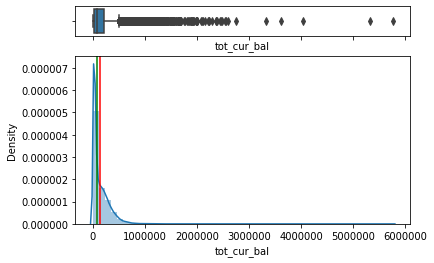

In [99]:
analyze_univariate_num(df['tot_cur_bal'])

Conclusion:
    1. Heavy outliers so we will transform them 
    2. values are not zero 

### Column/Attribute_43: open_acc_6m

Number of open trades in last 6 months,Open trade -- This term applies to a speculative trade or transaction that has not been closed. For instance, when a stock has been bought that is to be sold again it is an open trade or the trade is open until the stock actually is sold and the trade or transaction is thus completed or closed.

count    150792.000000
mean          0.902482
std           1.125236
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: open_acc_6m, dtype: float64
Skewness: 1.6725326441477573
Kurtosis: 4.137397533298203
Shapiro Result: (0.7672563195228577, 0.0)


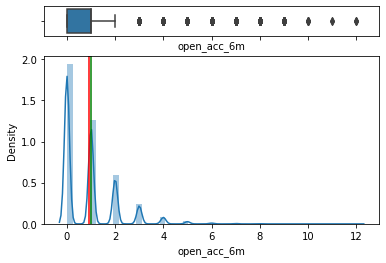

In [100]:
analyze_univariate_num(df['open_acc_6m'])

In [101]:
df['open_acc_6m'].value_counts(normalize=True)

0.0     0.466437
1.0     0.303597
2.0     0.141453
3.0     0.056774
4.0     0.020353
5.0     0.007089
6.0     0.002421
7.0     0.001121
8.0     0.000497
9.0     0.000186
10.0    0.000040
12.0    0.000020
11.0    0.000013
Name: open_acc_6m, dtype: float64

Conclusion:
    1. lower values can categorised into 1 

### Column/Attribute_44: open_act_il

Number of currently active installment trades

count    150792.000000
mean          2.665824
std           2.933081
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          44.000000
Name: open_act_il, dtype: float64
Skewness: 2.9951354466918576
Kurtosis: 14.140670622029567
Shapiro Result: (0.7159416675567627, 0.0)


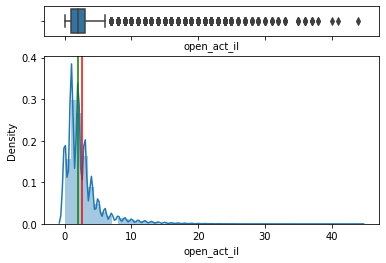

In [102]:
analyze_univariate_num(df['open_act_il'])

In [172]:
df['open_act_il'].nunique()

41

Conclusion:
    1. There are 41 different categories

### Column/Attribute_45: open_il_12m

Number of installment accounts opened in past 12 months

count    150792.000000
mean          0.659286
std           0.920579
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: open_il_12m, dtype: float64
Skewness: 1.7226976671494867
Kurtosis: 3.7166158425983538
Shapiro Result: (0.717360258102417, 0.0)


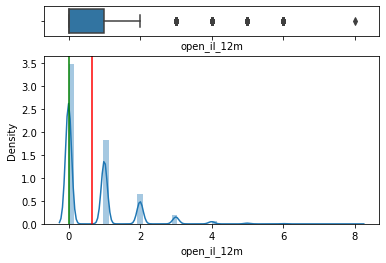

In [103]:
analyze_univariate_num(df['open_il_12m'])

0.0    0.557715
1.0    0.292403
2.0    0.103188
3.0    0.031931
4.0    0.010286
5.0    0.003303
6.0    0.001167
8.0    0.000007
Name: open_il_12m, dtype: float64


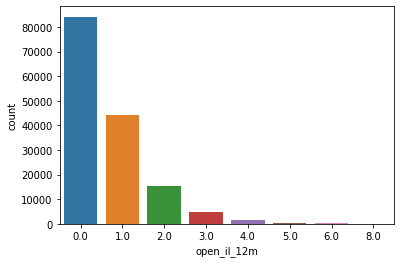

In [104]:
analyze_univariate_cat(df['open_il_12m'])

Conclusion:
    1. Lower classes can be categorized into one

### Column/Attribute_46: open_il_24m

Number of installment accounts opened in past 24 months

count    150792.00000
mean          1.50506
std           1.54241
min           0.00000
25%           0.00000
50%           1.00000
75%           2.00000
max          20.00000
Name: open_il_24m, dtype: float64
Skewness: 1.6527998511578215
Kurtosis: 4.424952116246468
Shapiro Result: (0.8256434202194214, 0.0)


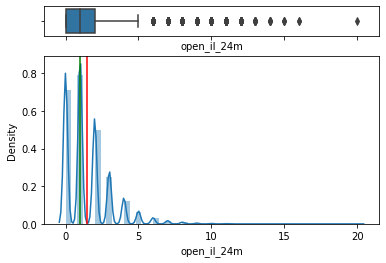

In [105]:
analyze_univariate_num(df['open_il_24m'])

1.0     0.315846
0.0     0.285685
2.0     0.200157
3.0     0.100775
4.0     0.049286
5.0     0.024365
6.0     0.011665
7.0     0.006075
8.0     0.003196
9.0     0.001426
10.0    0.000743
11.0    0.000438
12.0    0.000199
13.0    0.000066
14.0    0.000040
15.0    0.000020
16.0    0.000013
20.0    0.000007
Name: open_il_24m, dtype: float64


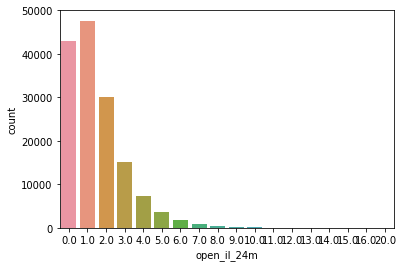

In [106]:
analyze_univariate_cat(df['open_il_24m'])

Conclusion:
    1. We can group the lower classes into one

### Column/Attribute_47:total_bal_il

Total current balance of all installment accounts

In [173]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


count    1.507920e+05
mean     3.477407e+04
std      4.480013e+04
min      0.000000e+00
25%      7.628000e+03
50%      2.209800e+04
75%      4.522425e+04
max      1.378570e+06
Name: total_bal_il, dtype: float64
Skewness: 3.9814696374522
Kurtosis: 33.186197139825445
Shapiro Result: (0.6784675717353821, 0.0)


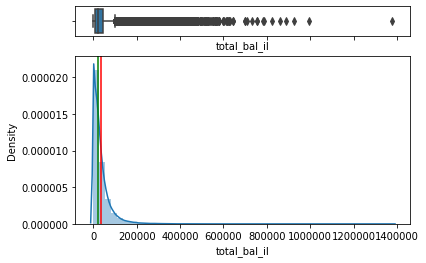

In [107]:
analyze_univariate_num(df['total_bal_il'])

### Column/Attribute_48: open_rv_12m

Number of revolving trades opened in past 12 months

count    150792.000000
mean          1.237174
std           1.495528
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          26.000000
Name: open_rv_12m, dtype: float64
Skewness: 2.032985331587439
Kurtosis: 7.4292370202368625
Shapiro Result: (0.7738664150238037, 0.0)


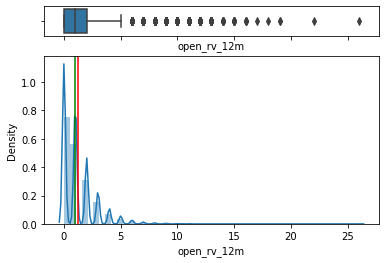

In [108]:
analyze_univariate_num(df['open_rv_12m'])

0.0     0.390246
1.0     0.293020
2.0     0.161096
3.0     0.079527
4.0     0.037840
5.0     0.019444
6.0     0.009218
7.0     0.004417
8.0     0.002328
9.0     0.001300
10.0    0.000550
11.0    0.000391
12.0    0.000239
13.0    0.000179
15.0    0.000066
14.0    0.000066
16.0    0.000033
19.0    0.000013
17.0    0.000007
26.0    0.000007
18.0    0.000007
22.0    0.000007
Name: open_rv_12m, dtype: float64


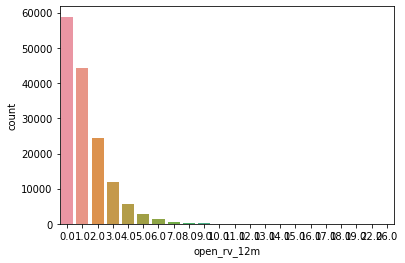

In [109]:
analyze_univariate_cat(df['open_rv_12m'])

### Column/Attribute_49: open_rv_24m

Number of revolving trades opened in past 24 months

count    150792.000000
mean          2.635465
std           2.564701
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: open_rv_24m, dtype: float64
Skewness: 2.0220601844377057
Kurtosis: 8.158201005886234
Shapiro Result: (0.8281901478767395, 0.0)


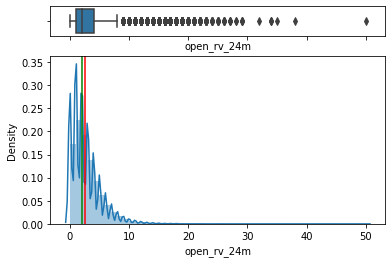

In [110]:
analyze_univariate_num(df['open_rv_24m'])

1.0     0.223871
2.0     0.192066
0.0     0.173683
3.0     0.138734
4.0     0.093612
5.0     0.062901
6.0     0.039810
7.0     0.025910
8.0     0.016513
9.0     0.010710
10.0    0.006970
11.0    0.004888
12.0    0.003157
13.0    0.002089
14.0    0.001532
15.0    0.000995
16.0    0.000617
17.0    0.000531
18.0    0.000431
19.0    0.000232
20.0    0.000146
21.0    0.000133
22.0    0.000119
23.0    0.000093
25.0    0.000053
24.0    0.000053
26.0    0.000040
29.0    0.000027
27.0    0.000027
34.0    0.000020
28.0    0.000013
50.0    0.000007
35.0    0.000007
38.0    0.000007
32.0    0.000007
Name: open_rv_24m, dtype: float64


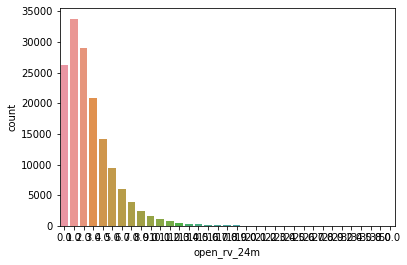

In [111]:
analyze_univariate_cat(df['open_rv_24m'])

### Column/Attribute_50: max_bal_bc

Maximum current balance owed on all revolving accounts

In [179]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


#### Can we find a relationship between max_bal_bc and revol_bal?

In [181]:
len(df[(df['max_bal_bc']<=df['revol_bal'])==False])

0

count    1.507920e+05
mean     5.801243e+03
std      6.362696e+03
min      0.000000e+00
25%      2.119000e+03
50%      4.391000e+03
75%      7.714000e+03
max      1.170668e+06
Name: max_bal_bc, dtype: float64
Skewness: 43.28178620143812
Kurtosis: 7485.307125217029
Shapiro Result: (0.6153383255004883, 0.0)


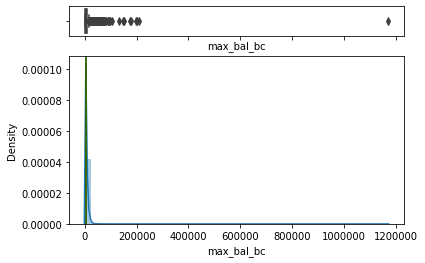

In [112]:
analyze_univariate_num(df['max_bal_bc'])

Conclusion:
    1. Heavy no.of outliers but distrubted at lower values , make classes 

In [178]:
df['max_bal_bc'].nunique()

21345

### Column/Attribute_51: total_rev_hi_lim

Total revolving high credit/credit limit

count    1.507920e+05
mean     3.819658e+04
std      3.778567e+04
min      0.000000e+00
25%      1.590000e+04
50%      2.840000e+04
75%      4.860000e+04
max      2.059200e+06
Name: total_rev_hi_lim, dtype: float64
Skewness: 6.686011257317964
Kurtosis: 178.22429489239383
Shapiro Result: (0.6796684265136719, 0.0)


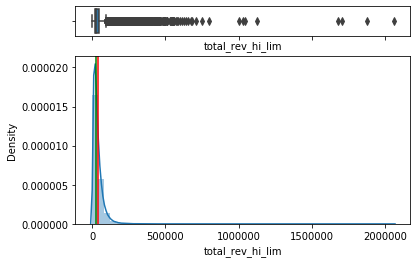

In [113]:
analyze_univariate_num(df['total_rev_hi_lim'])

Conclusion:
    1. Most of the data is disributed to lower values

### Column/Attribute_52: inq_fi 

Number of personal finance inquiries

count    150792.000000
mean          1.062948
std           1.506896
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          38.000000
Name: inq_fi, dtype: float64
Skewness: 2.7427008917465545
Kurtosis: 15.993505214620562
Shapiro Result: (0.7036021947860718, 0.0)


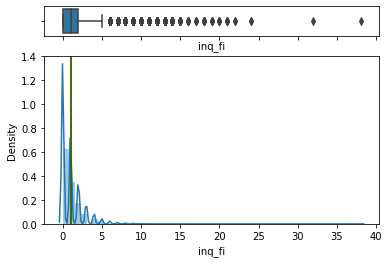

In [114]:
analyze_univariate_num(df['inq_fi'])

0.0     0.473042
1.0     0.266718
2.0     0.131055
3.0     0.063306
4.0     0.031613
5.0     0.015545
6.0     0.008256
7.0     0.004324
8.0     0.002460
9.0     0.001379
10.0    0.000809
11.0    0.000438
12.0    0.000345
13.0    0.000245
14.0    0.000159
15.0    0.000086
18.0    0.000046
16.0    0.000033
19.0    0.000027
20.0    0.000027
21.0    0.000027
17.0    0.000020
24.0    0.000013
22.0    0.000013
38.0    0.000007
32.0    0.000007
Name: inq_fi, dtype: float64


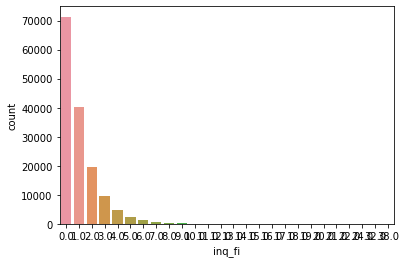

In [182]:
analyze_univariate_cat(df['inq_fi'])

### Column/Attribute_53: inq_last_12m

Number of credit inquiries in past 12 months

count    150792.000000
mean          1.979853
std           2.395108
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          46.000000
Name: inq_last_12m, dtype: float64
Skewness: 2.5408533179318917
Kurtosis: 13.041852100658055
Shapiro Result: (0.7598985433578491, 0.0)


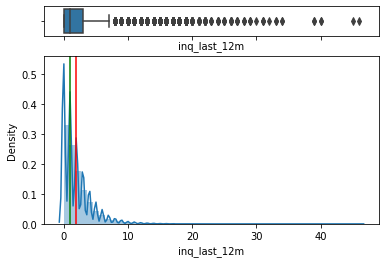

In [115]:
analyze_univariate_num(df['inq_last_12m'])

0.0     0.304068
1.0     0.244138
2.0     0.162436
3.0     0.105350
4.0     0.065846
5.0     0.041176
6.0     0.026566
7.0     0.016440
8.0     0.010757
9.0     0.007447
10.0    0.004556
11.0    0.003548
12.0    0.002314
13.0    0.001525
14.0    0.001074
15.0    0.000630
16.0    0.000517
17.0    0.000418
18.0    0.000351
19.0    0.000265
20.0    0.000113
22.0    0.000093
21.0    0.000066
26.0    0.000046
25.0    0.000033
24.0    0.000033
23.0    0.000027
27.0    0.000027
31.0    0.000020
28.0    0.000020
29.0    0.000020
40.0    0.000013
34.0    0.000013
33.0    0.000013
39.0    0.000013
45.0    0.000007
30.0    0.000007
32.0    0.000007
46.0    0.000007
Name: inq_last_12m, dtype: float64


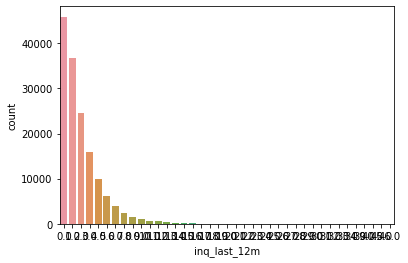

In [183]:
analyze_univariate_cat(df['inq_last_12m'])

### Column/Attribute_54: acc_open_past_24mths 

Number of trades opened in past 24 months.

count    150792.000000
mean          4.421342
std           3.230447
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          54.000000
Name: acc_open_past_24mths, dtype: float64
Skewness: 1.455031497314827
Kurtosis: 4.205781966188807
Shapiro Result: (0.8986400961875916, 0.0)


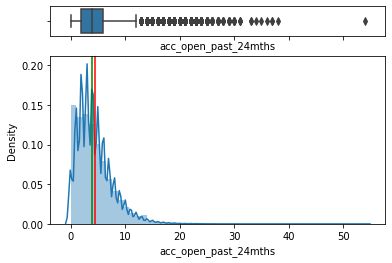

In [116]:
analyze_univariate_num(df['acc_open_past_24mths'])

3.0     0.150293
2.0     0.145790
4.0     0.136453
1.0     0.110768
5.0     0.109442
6.0     0.086311
7.0     0.061681
0.0     0.051090
8.0     0.044465
9.0     0.032057
10.0    0.022508
11.0    0.014636
12.0    0.010936
13.0    0.007235
14.0    0.004828
15.0    0.003468
16.0    0.002235
17.0    0.001665
18.0    0.001134
19.0    0.000842
20.0    0.000524
21.0    0.000371
22.0    0.000351
23.0    0.000259
24.0    0.000166
25.0    0.000139
26.0    0.000080
27.0    0.000073
29.0    0.000046
30.0    0.000040
28.0    0.000033
31.0    0.000020
33.0    0.000013
37.0    0.000013
54.0    0.000007
35.0    0.000007
38.0    0.000007
36.0    0.000007
34.0    0.000007
Name: acc_open_past_24mths, dtype: float64


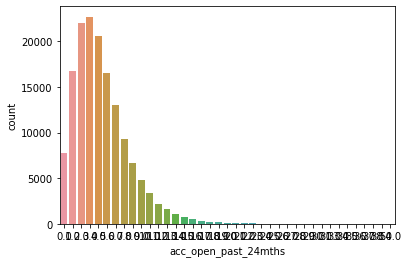

In [184]:
analyze_univariate_cat(df['acc_open_past_24mths'])

### Column/Attribute_55: chargeoff_within_12_mths

Number of charge-offs within 12 months

count    150792.000000
mean          0.006837
std           0.095802
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: chargeoff_within_12_mths, dtype: float64
Skewness: 23.17466760809714
Kurtosis: 1077.7213158218058
Shapiro Result: (0.04344820976257324, 0.0)


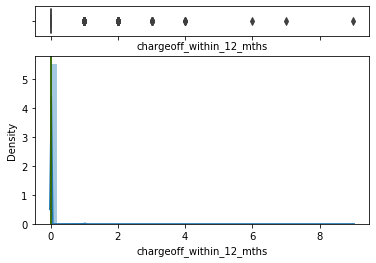

In [117]:
analyze_univariate_num(df['chargeoff_within_12_mths'])

0.0    0.993859
1.0    0.005670
2.0    0.000358
3.0    0.000066
4.0    0.000027
7.0    0.000007
6.0    0.000007
9.0    0.000007
Name: chargeoff_within_12_mths, dtype: float64


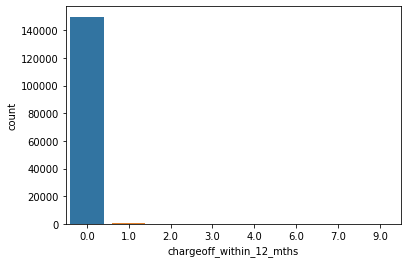

In [118]:
analyze_univariate_cat(df['chargeoff_within_12_mths'])

Conclusion:
    1. 99% of the values are 0 

### Column/Attribute_56: delinq_amnt

The past-due amount owed for the accounts on which the borrower is now delinquent.

count    150792.000000
mean          3.638946
std         324.377211
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       65000.000000
Name: delinq_amnt, dtype: float64
Skewness: 135.61198530605415
Kurtosis: 21389.724865964177
Shapiro Result: (0.001980721950531006, 0.0)


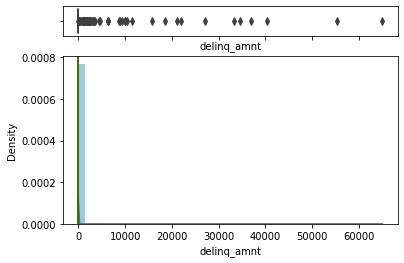

In [119]:
analyze_univariate_num(df['delinq_amnt'])

0.0        0.999403
753.0      0.000013
1236.0     0.000013
435.0      0.000007
55468.0    0.000007
103.0      0.000007
233.0      0.000007
26.0       0.000007
64.0       0.000007
18436.0    0.000007
36969.0    0.000007
9349.0     0.000007
2343.0     0.000007
3369.0     0.000007
4695.0     0.000007
3285.0     0.000007
27028.0    0.000007
106.0      0.000007
2382.0     0.000007
2384.0     0.000007
2393.0     0.000007
2422.0     0.000007
1686.0     0.000007
409.0      0.000007
1125.0     0.000007
25.0       0.000007
130.0      0.000007
1554.0     0.000007
33356.0    0.000007
98.0       0.000007
6275.0     0.000007
789.0      0.000007
6350.0     0.000007
34680.0    0.000007
8709.0     0.000007
70.0       0.000007
6430.0     0.000007
2192.0     0.000007
403.0      0.000007
8808.0     0.000007
4420.0     0.000007
2214.0     0.000007
3252.0     0.000007
1115.0     0.000007
52.0       0.000007
3043.0     0.000007
65000.0    0.000007
2882.0     0.000007
21872.0    0.000007
943.0      0.000007


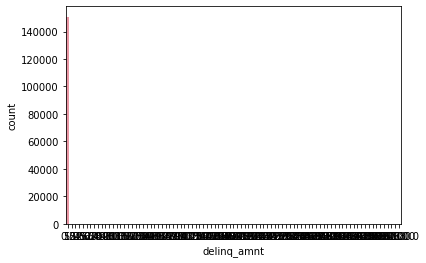

In [120]:
analyze_univariate_cat(df['delinq_amnt'])

Conclusion:
    1. 99% of the values are zero 

### Column/Attribute_57: mo_sin_old_rev_tl_op

In [186]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


In [190]:
(df_not_null['issue_d']-df_not_null['earliest_cr_line']).head(2)

0   4230 days
1   4657 days
dtype: timedelta64[ns]

#### Can we find a relationship between (issue_d)-(earliest_cr_line)=mo_sin_old_rev_tl_op?

Months since oldest revolving account opened

count    150792.000000
mean        178.509623
std         101.125620
min           1.000000
25%         112.000000
50%         160.000000
75%         231.000000
max         817.000000
Name: mo_sin_old_rev_tl_op, dtype: float64
Skewness: 1.0044117137299393
Kurtosis: 1.3007065328429945
Shapiro Result: (0.942082941532135, 0.0)


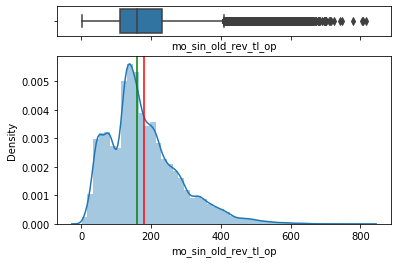

In [121]:
analyze_univariate_num(df['mo_sin_old_rev_tl_op'])

In [185]:
df['mo_sin_old_rev_tl_op'].nunique()

681

### Column/Attribute_58: mo_sin_rcnt_rev_tl_op

Months since most recent revolving account opened

count    150792.000000
mean         15.070488
std          18.843543
min           0.000000
25%           4.000000
50%           9.000000
75%          19.000000
max         502.000000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64
Skewness: 3.7404856958612087
Kurtosis: 24.80913430140693
Shapiro Result: (0.6601120233535767, 0.0)


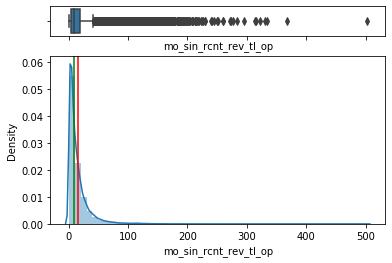

In [122]:
analyze_univariate_num(df['mo_sin_rcnt_rev_tl_op'])

In [191]:
df['mo_sin_rcnt_rev_tl_op'].nunique()

234

### Column/Attribute_59: mo_sin_rcnt_tl

Months since most recent account opened

count    150792.000000
mean          8.750816
std           9.675862
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max         368.000000
Name: mo_sin_rcnt_tl, dtype: float64
Skewness: 5.088484603979294
Kurtosis: 64.65294986481298
Shapiro Result: (0.6597939133644104, 0.0)


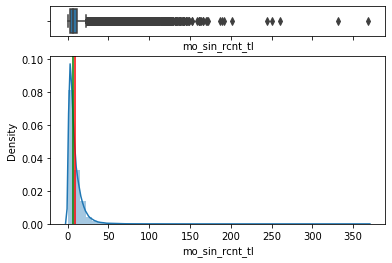

In [123]:
analyze_univariate_num(df['mo_sin_rcnt_tl'])

### Column/Attribute_60: mort_acc

Number of mortgage accounts.

count    150792.000000
mean          1.375763
std           1.737078
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          46.000000
Name: mort_acc, dtype: float64
Skewness: 1.8077774926150518
Kurtosis: 8.169058116036041
Shapiro Result: (0.7800636291503906, 0.0)


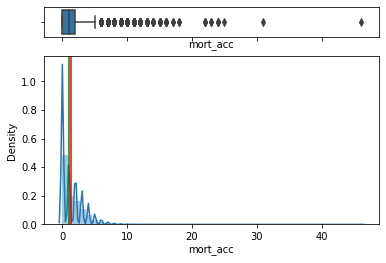

In [124]:
analyze_univariate_num(df['mort_acc'])

0.0     0.449328
1.0     0.180958
2.0     0.150572
3.0     0.100629
4.0     0.058856
5.0     0.030731
6.0     0.015001
7.0     0.007262
8.0     0.003296
9.0     0.001532
10.0    0.000842
11.0    0.000444
12.0    0.000166
13.0    0.000113
15.0    0.000073
14.0    0.000053
16.0    0.000046
22.0    0.000020
24.0    0.000020
23.0    0.000013
17.0    0.000013
18.0    0.000013
31.0    0.000007
25.0    0.000007
46.0    0.000007
Name: mort_acc, dtype: float64


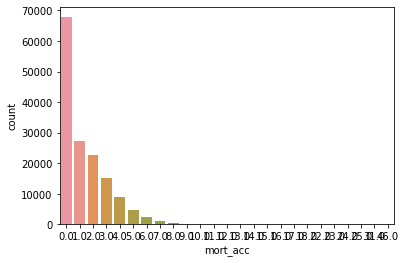

In [193]:
analyze_univariate_cat(df['mort_acc'])

### Column/Attribute_61: num_accts_ever_120_pd

Number of accounts ever 120 or more days past due

count    150792.000000
mean          0.456908
std           1.341429
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          37.000000
Name: num_accts_ever_120_pd, dtype: float64
Skewness: 5.999255651387435
Kurtosis: 60.55223547230221
Shapiro Result: (0.379253625869751, 0.0)


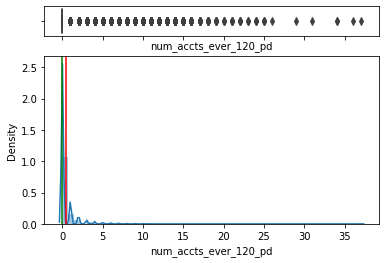

In [125]:
analyze_univariate_num(df['num_accts_ever_120_pd'])

0.0     0.792509
1.0     0.114263
2.0     0.041368
3.0     0.018947
4.0     0.011672
5.0     0.006904
6.0     0.004529
7.0     0.002931
8.0     0.002003
9.0     0.001326
10.0    0.000995
11.0    0.000643
12.0    0.000511
14.0    0.000312
13.0    0.000292
15.0    0.000166
16.0    0.000166
17.0    0.000093
18.0    0.000093
19.0    0.000053
22.0    0.000040
21.0    0.000040
25.0    0.000027
20.0    0.000027
24.0    0.000027
23.0    0.000020
34.0    0.000013
29.0    0.000007
36.0    0.000007
37.0    0.000007
31.0    0.000007
26.0    0.000007
Name: num_accts_ever_120_pd, dtype: float64


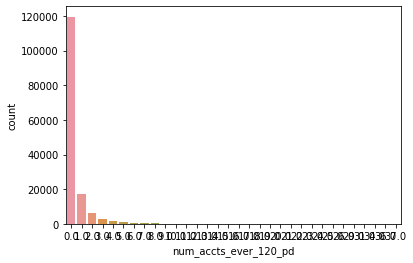

In [126]:
analyze_univariate_cat(df['num_accts_ever_120_pd'])

### Column/Attribute_62: num_actv_bc_tl

Number of currently active bankcard accounts

count    150792.000000
mean          3.563916
std           2.409093
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          32.000000
Name: num_actv_bc_tl, dtype: float64
Skewness: 1.4765743256381214
Kurtosis: 4.127812730225382
Shapiro Result: (0.890532374382019, 0.0)


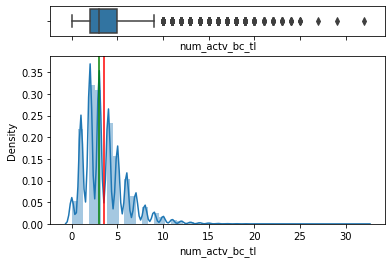

In [127]:
analyze_univariate_num(df['num_actv_bc_tl'])

### Column/Attribute_63: num_actv_rev_tl

Number of currently active revolving trades

count    150792.000000
mean          5.277448
std           3.417887
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          45.000000
Name: num_actv_rev_tl, dtype: float64
Skewness: 1.5689150115782424
Kurtosis: 4.592751492232998
Shapiro Result: (0.890060305595398, 0.0)


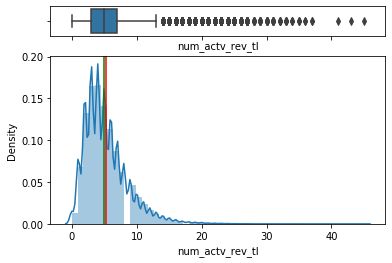

In [128]:
analyze_univariate_num(df['num_actv_rev_tl'])

### Column/Attribute_64: num_bc_sats 

Number of satisfactory bankcard accounts, Bankcard accounts include credit cards and charge cards from a bank and are frequently revolving accounts. Revolving accounts allow you to carry a balance and your monthly payment will vary, based on the amount of your balance. Having too few accounts with high credit limits is an indicator that you lack available credit. Having higher limits gives you access to credit without seeking new loans or becoming overextended _ which are triggers for higher risk.

In [194]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


In [196]:
len(df[(df['num_actv_bc_tl']==df['num_bc_sats'])==False])

83070

In [197]:
len(df[(df['num_actv_rev_tl']==df['num_rev_tl_bal_gt_0'])==False])

4487

count    150792.000000
mean          4.824818
std           3.188258
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          48.000000
Name: num_bc_sats, dtype: float64
Skewness: 1.6801290164506633
Kurtosis: 5.697059118456401
Shapiro Result: (0.8799027800559998, 0.0)


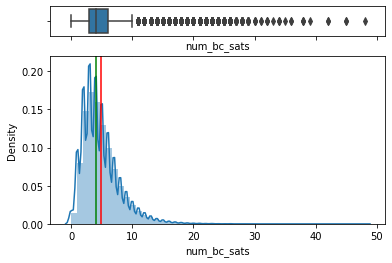

In [130]:
analyze_univariate_num(df['num_bc_sats'])

3.0     0.165904
4.0     0.153198
2.0     0.141665
5.0     0.124828
6.0     0.094939
1.0     0.076184
7.0     0.069055
8.0     0.048066
9.0     0.033609
10.0    0.023317
11.0    0.016500
0.0     0.013170
12.0    0.011566
13.0    0.008210
14.0    0.005544
15.0    0.004112
16.0    0.002805
17.0    0.002009
18.0    0.001419
19.0    0.000988
20.0    0.000683
21.0    0.000584
22.0    0.000358
23.0    0.000345
26.0    0.000192
24.0    0.000192
25.0    0.000146
28.0    0.000113
29.0    0.000066
27.0    0.000066
30.0    0.000027
38.0    0.000020
32.0    0.000020
34.0    0.000020
45.0    0.000013
36.0    0.000013
42.0    0.000013
31.0    0.000013
35.0    0.000007
48.0    0.000007
39.0    0.000007
33.0    0.000007
Name: num_bc_sats, dtype: float64


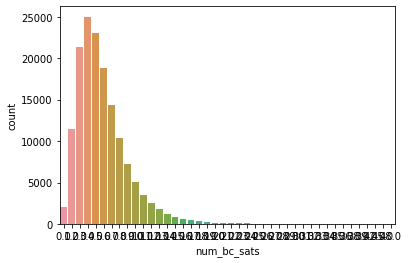

In [132]:
analyze_univariate_cat(df['num_bc_sats'])

Conclusion:
    1. This one also looks like the one which has many classes in the category

### Column/Attribute_65: num_bc_tl

Number of bankcard accounts,A bank card is any card issued against a depository account, such as an ATM card or a debit card. Sometimes the phrase is also used to refer to Visa and MasterCards since these are also issued by banks, but they are credit cards and not linked directly to a depository account.Bank cards may be limited in their use; some can only be used at ATM machines or for certain purchases. Most bank ATM cards also require a PIN in order to be used.

count    150792.000000
mean          7.169565
std           4.553921
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          86.000000
Name: num_bc_tl, dtype: float64
Skewness: 1.557366483900734
Kurtosis: 4.8043472571958254
Shapiro Result: (0.893124520778656, 0.0)


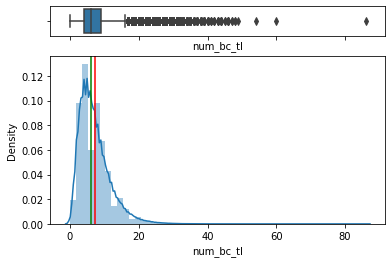

In [133]:
analyze_univariate_num(df['num_bc_tl'])

4.0     0.111624
5.0     0.111591
6.0     0.103248
3.0     0.098308
7.0     0.091676
8.0     0.077391
2.0     0.069632
9.0     0.063830
10.0    0.051349
11.0    0.041070
12.0    0.032336
1.0     0.030101
13.0    0.024962
14.0    0.019623
15.0    0.016334
16.0    0.011844
17.0    0.009039
18.0    0.007481
19.0    0.005511
20.0    0.004132
0.0     0.003455
21.0    0.003309
22.0    0.002513
23.0    0.002182
24.0    0.001611
25.0    0.001214
26.0    0.000988
27.0    0.000783
28.0    0.000590
29.0    0.000458
30.0    0.000345
31.0    0.000325
33.0    0.000186
32.0    0.000186
35.0    0.000139
34.0    0.000133
38.0    0.000073
36.0    0.000066
37.0    0.000060
39.0    0.000060
44.0    0.000040
40.0    0.000040
46.0    0.000033
43.0    0.000027
41.0    0.000020
42.0    0.000020
48.0    0.000013
47.0    0.000013
45.0    0.000013
60.0    0.000007
86.0    0.000007
54.0    0.000007
49.0    0.000007
Name: num_bc_tl, dtype: float64


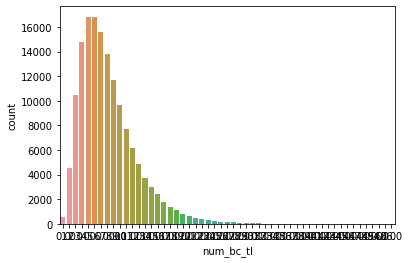

In [134]:
analyze_univariate_cat(df['num_bc_tl'])

Conclusion:

### Column/Attribute_66: num_il_tl

Number of installment accounts, An installment account is a loan, which is to say it's credit you take out that has to be paid off over time with a set number of scheduled payments. Just like its name, the loan is paid off little by little each month in installments. Once the loan is paid off, the account will typically be considered closed.

count    150792.000000
mean          8.084381
std           7.300791
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max         109.000000
Name: num_il_tl, dtype: float64
Skewness: 2.1711583439892674
Kurtosis: 8.140257033849686
Shapiro Result: (0.8196000456809998, 0.0)


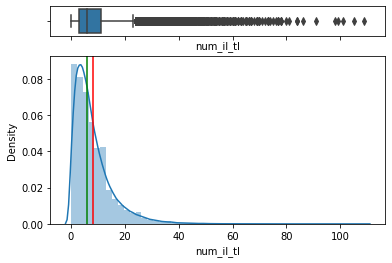

In [135]:
analyze_univariate_num(df['num_il_tl'])

Conclusion:

### Column/Attribute_67: num_op_rev_tl

Number of open revolving accounts, A revolving account is a type of credit account that provides a borrower with a maximum limit and allows for varying credit availability. Revolving accounts do not have a specified maturity date and can remain open as long as a borrower remains in good standing with the creditor.

count    150792.000000
mean          8.111020
std           4.918112
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          70.000000
Name: num_op_rev_tl, dtype: float64
Skewness: 1.5557732945267868
Kurtosis: 4.506989123123452
Shapiro Result: (0.8927118182182312, 0.0)


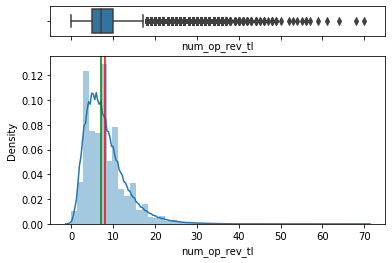

In [137]:
analyze_univariate_num(df['num_op_rev_tl'])

Conclusion:

### Column/Attribute_68: num_rev_accts

Number of revolving accounts

count    150792.000000
mean         12.967147
std           7.892538
min           2.000000
25%           7.000000
50%          11.000000
75%          17.000000
max         151.000000
Name: num_rev_accts, dtype: float64
Skewness: 1.4981652031055022
Kurtosis: 4.225696372104489
Shapiro Result: (0.8979705572128296, 0.0)


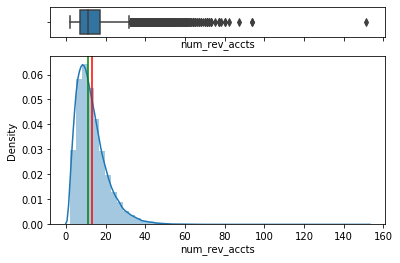

In [139]:
analyze_univariate_num(df['num_rev_accts'])

Conclusion:

### Column/Attribute_69: num_rev_tl_bal_gt_0

Number of revolving trades with balance >0, Revolving credit is an agreement that permits an account holder to borrow money repeatedly up to a set dollar limit while repaying a portion of the current balance due in regular payments. Each payment, minus the interest and fees charged, replenishes the amount available to the account holder.
Credit cards and lines of credit both work on the principle of revolving credit.

count    150792.000000
mean          5.229681
std           3.333249
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          45.000000
Name: num_rev_tl_bal_gt_0, dtype: float64
Skewness: 1.4885687277497368
Kurtosis: 4.0905288310366155
Shapiro Result: (0.8955274820327759, 0.0)


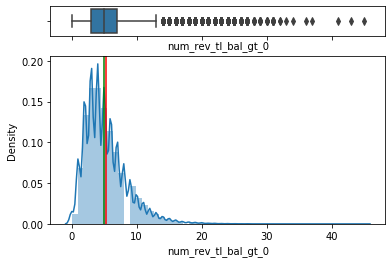

In [140]:
analyze_univariate_num(df['num_rev_tl_bal_gt_0'])

In [198]:
df['num_rev_tl_bal_gt_0'].nunique()

40

Conclusion:

### Column/Attribute_70: num_sats

Number of satisfactory accounts, Accounts in good standing, or satisfactory accounts, are accounts that have been reported to the credit bureau(s) as paid on time and in full during a reported period of time, typically up to 53 months. Collateral is property that the credit account holder uses to secure a line of credit.

In [199]:
df_not_null.head(2)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Year,Month
0,343481,16000,16000,16000.0,36 months,18.45,582.06,D,D2,RENT,85000.0,Source Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,482xx,MI,1.0,2006-09-01,1.0,15.0,0.0,1156,25.0,w,12782.62,12782.62,5222.14,5222.14,3217.38,2004.76,0.0,0.0,0.0,582.06,1.0,1,Joint App,0.0,0.0,106254.0,3.0,1.0,2.0,3.0,27811.0,1.0,5.0,402.0,29200.0,2.0,4.0,2.0,9.0,0.0,0.0,139.0,2.0,2.0,2.0,1.0,3.0,5.0,3.0,5.0,8.0,12.0,15.0,5.0,15.0,0.0,1.0,3.0,0.0,0.0,136334.0,28967.0,11600.0,27934.0,N,Cash,N,2018,4
1,343482,28675,28675,28675.0,60 months,26.77,871.67,E,E5,MORTGAGE,78000.0,Verified,2018-04-01,Current,n,debt_consolidation,Debt consolidation,114xx,NY,0.0,2005-07-01,1.0,23.0,0.0,26933,68.0,w,26107.93,26107.93,8674.05,8674.05,2567.07,6106.98,0.0,0.0,0.0,871.67,0.0,1,Individual,0.0,0.0,533522.0,1.0,15.0,0.0,0.0,156597.0,2.0,4.0,10540.0,38800.0,0.0,1.0,1.0,4.0,0.0,0.0,128.0,2.0,2.0,2.0,0.0,4.0,7.0,4.0,11.0,50.0,7.0,16.0,7.0,23.0,0.0,0.0,2.0,0.0,0.0,537686.0,183530.0,29300.0,135639.0,N,Cash,N,2018,4


count    150792.000000
mean         11.405380
std           5.914563
min           0.000000
25%           7.000000
50%          10.000000
75%          14.000000
max          72.000000
Name: num_sats, dtype: float64
Skewness: 1.2900737193674137
Kurtosis: 3.048515451008746
Shapiro Result: (0.9214863777160645, 0.0)


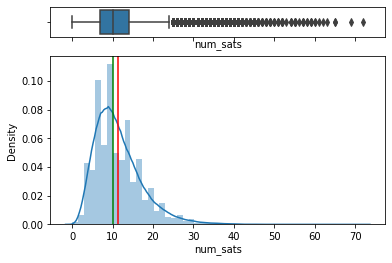

In [141]:
analyze_univariate_num(df['num_sats'])

Conclusion:

### Column/Attribute_71: num_tl_30dpd

Number of accounts currently 30 days past due (updated in past 2 months)

count    150792.000000
mean          0.000153
std           0.012349
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: num_tl_30dpd, dtype: float64
Skewness: 80.95248262407489
Kurtosis: 6551.391336089951
Shapiro Result: (0.002271413803100586, 0.0)


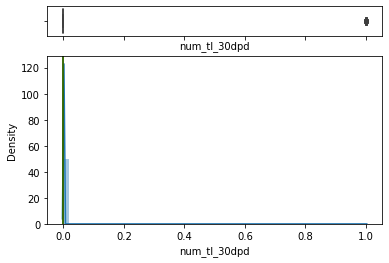

In [142]:
analyze_univariate_num(df['num_tl_30dpd'])

0.0    0.999847
1.0    0.000153
Name: num_tl_30dpd, dtype: float64


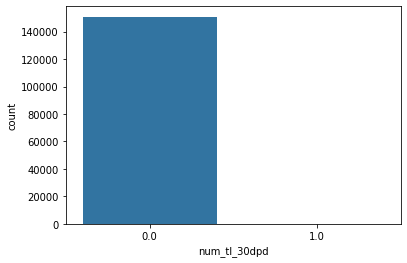

In [143]:
analyze_univariate_cat(df['num_tl_30dpd'])

Conclusion:
    1. either we can drop them or create dummies for those

### Column/Attribute_72: num_tl_90g_dpd_24m 

Number of accounts 90 or more days past due in last 24 months

count    150792.000000
mean          0.059267
std           0.404786
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: num_tl_90g_dpd_24m, dtype: float64
Skewness: 15.696825621666209
Kurtosis: 403.30540931512024
Shapiro Result: (0.12708961963653564, 0.0)


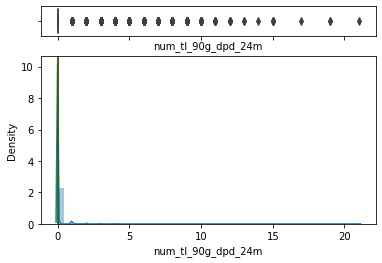

In [145]:
analyze_univariate_num(df['num_tl_90g_dpd_24m'])

0.0     0.960024
1.0     0.031500
2.0     0.004828
3.0     0.001353
4.0     0.000942
5.0     0.000358
6.0     0.000265
7.0     0.000199
9.0     0.000139
8.0     0.000113
10.0    0.000113
11.0    0.000053
12.0    0.000040
15.0    0.000027
13.0    0.000013
19.0    0.000013
14.0    0.000007
21.0    0.000007
17.0    0.000007
Name: num_tl_90g_dpd_24m, dtype: float64


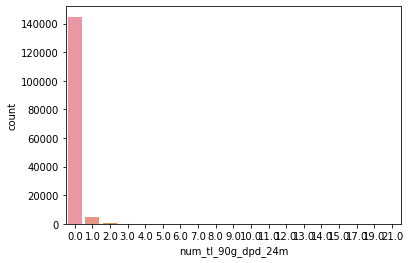

In [146]:
analyze_univariate_cat(df['num_tl_90g_dpd_24m'])

Conclusion:
    1. 96% of the values are 0 so either we can drop them or make two classes

### Column/Attribute_73: num_tl_op_past_12m

Number of accounts opened in past 12 months

count    150792.000000
mean          2.028994
std           1.888590
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          26.000000
Name: num_tl_op_past_12m, dtype: float64
Skewness: 1.4844880350768266
Kurtosis: 3.8598171093120266
Shapiro Result: (0.8620688915252686, 0.0)


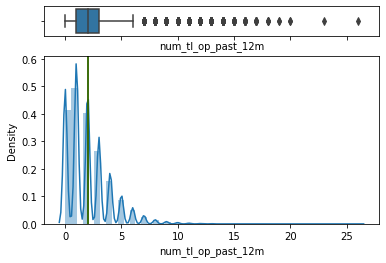

In [148]:
analyze_univariate_num(df['num_tl_op_past_12m'])

Conclusion:
    

### Column/Attribute_74: pub_rec_bankruptcies

Number of public record bankruptcies, Unless sealed, all documents filed in a bankruptcy case are available for public viewing. Information contained in bankruptcy case documents is a matter of public record. Credit reporting agencies regularly collect and disclose bankruptcy data to the public.

count    150792.000000
mean          0.122526
std           0.334621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: pub_rec_bankruptcies, dtype: float64
Skewness: 2.5697431883775086
Kurtosis: 6.814264849190889
Shapiro Result: (0.38262444734573364, 0.0)


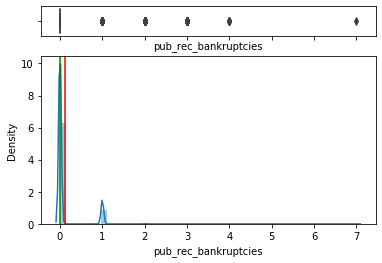

In [149]:
analyze_univariate_num(df['pub_rec_bankruptcies'])

0.0    0.879311
1.0    0.119138
2.0    0.001333
3.0    0.000172
4.0    0.000040
7.0    0.000007
Name: pub_rec_bankruptcies, dtype: float64


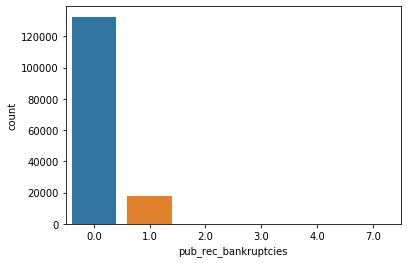

In [150]:
analyze_univariate_cat(df['pub_rec_bankruptcies'])

Coclusion:
    1. 87% of the values are zero

### Column/Attribute_75: tax_liens

Number of tax liens, A tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government. In general, a lien serves to guarantee payment of a debt such as a loan, or in this case, taxes. If the obligation is not satisfied, the creditor may proceed to seize the assets.

count    150792.000000
mean          0.035367
std           0.327916
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: tax_liens, dtype: float64
Skewness: 39.3275195196181
Kurtosis: 4566.052280199055
Shapiro Result: (0.08114665746688843, 0.0)


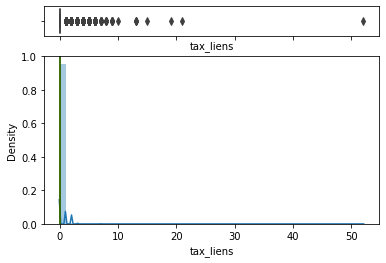

In [151]:
analyze_univariate_num(df['tax_liens'])

0.0     0.978142
1.0     0.014755
2.0     0.004145
3.0     0.001552
4.0     0.000729
5.0     0.000298
6.0     0.000179
7.0     0.000066
9.0     0.000046
8.0     0.000033
13.0    0.000020
15.0    0.000007
21.0    0.000007
52.0    0.000007
19.0    0.000007
10.0    0.000007
Name: tax_liens, dtype: float64


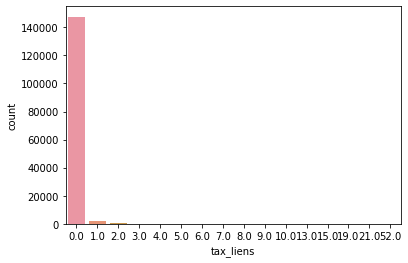

In [152]:
analyze_univariate_cat(df['tax_liens'])

Conclusion:
    1. 97% of the values are 0 

### Column/Attribute_76: tot_hi_cred_lim

Total high credit/credit limit

count    1.507920e+05
mean     1.844217e+05
std      1.874950e+05
min      0.000000e+00
25%      5.182475e+04
50%      1.171000e+05
75%      2.681105e+05
max      6.057411e+06
Name: tot_hi_cred_lim, dtype: float64
Skewness: 2.8456174773557015
Kurtosis: 26.92108615796531
Shapiro Result: (0.784542977809906, 0.0)


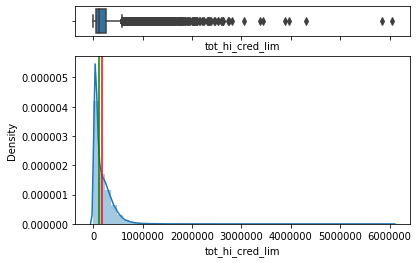

In [154]:
analyze_univariate_num(df['tot_hi_cred_lim'])

Conclusion:
    1. Heavy no.of outliers , data has to be transformed or scaled 

### Column/Attribute_77: total_bal_ex_mort

Total credit balance excluding mortgage

count    1.507920e+05
mean     5.109585e+04
std      5.246901e+04
min      0.000000e+00
25%      1.915000e+04
50%      3.699350e+04
75%      6.513175e+04
max      1.508205e+06
Name: total_bal_ex_mort, dtype: float64
Skewness: 3.7351105377447285
Kurtosis: 31.778916211520976
Shapiro Result: (0.7193174362182617, 0.0)


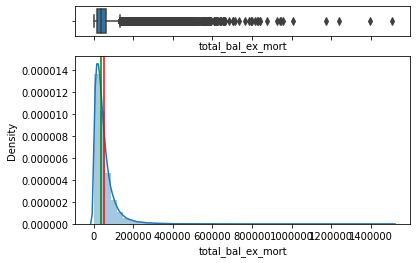

In [156]:
analyze_univariate_num(df['total_bal_ex_mort'])

Conclusion:
    1. Heavy no.of outliers and the data has to be transformed or scaled 

### Column/Attribute_78: total_bc_limit

Total bankcard high credit/credit limit

count    1.507920e+05
mean     2.670198e+04
std      2.603491e+04
min      0.000000e+00
25%      9.600000e+03
50%      1.920000e+04
75%      3.530000e+04
max      1.569000e+06
Name: total_bc_limit, dtype: float64
Skewness: 3.7724693413839123
Kurtosis: 92.4548091332392
Shapiro Result: (0.774807333946228, 0.0)


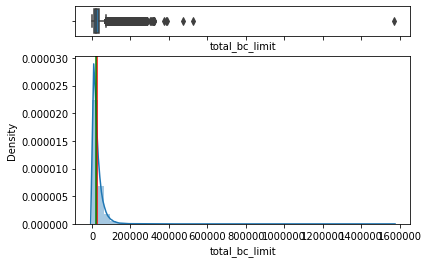

In [157]:
analyze_univariate_num(df['total_bc_limit'])

Conclusion:
    1. 

### Column/Attribute_79: total_il_high_credit_limit

Total installment high credit/credit limit

count    1.507920e+05
mean     4.523293e+04
std      4.747885e+04
min      0.000000e+00
25%      1.465375e+04
50%      3.335300e+04
75%      6.130000e+04
max      1.380346e+06
Name: total_il_high_credit_limit, dtype: float64
Skewness: 2.9025364462962373
Kurtosis: 19.628283317760992
Shapiro Result: (0.7778491973876953, 0.0)


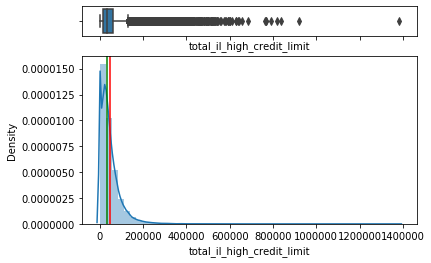

In [158]:
analyze_univariate_num(df['total_il_high_credit_limit'])

Conclusion:

### Column/Attribute_80: hardship_flag

N    0.999145
Y    0.000855
Name: hardship_flag, dtype: float64


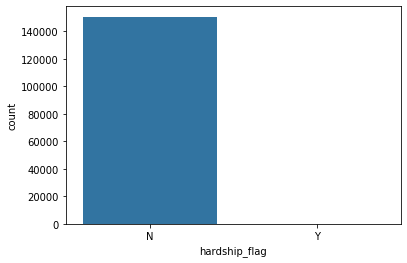

In [159]:
analyze_univariate_cat(df['hardship_flag'])

Conclusion:
    1. 99.9% the values are N so we drop this variable

### Column/Attribute_81: disbursement_method

Cash         0.927702
DirectPay    0.072298
Name: disbursement_method, dtype: float64


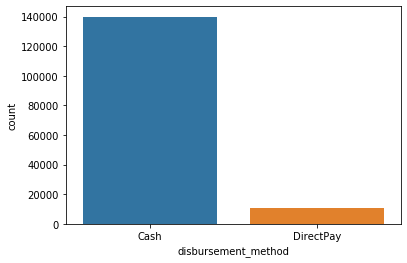

In [160]:
analyze_univariate_cat(df['disbursement_method'])

Conclusion:
    1. 92.7% of the value are cash, we can make dummies for this 

### Column/Attribute_82: debt_settlement_flag

N    0.99803
Y    0.00197
Name: debt_settlement_flag, dtype: float64


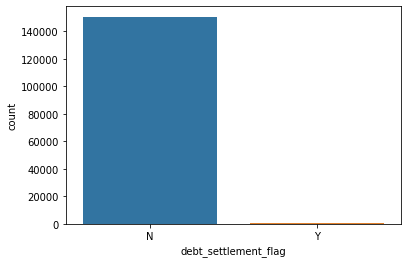

In [162]:
analyze_univariate_cat(df['debt_settlement_flag'])

Conclusion:
    1. 99.8% of the values are N so we can drop this variable

### Column/Attribute_83:Home_ownership

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

MORTGAGE    0.480443
RENT        0.390982
OWN         0.128548
ANY         0.000027
Name: home_ownership, dtype: float64


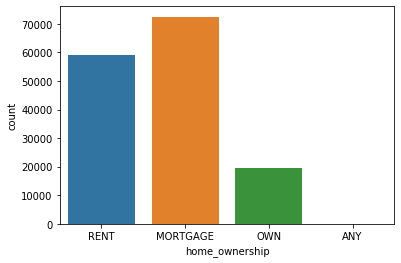

In [164]:
analyze_univariate_cat(df['home_ownership'])

Conclusion:
    1. Get dummies 

In [ ]:
Column/Attribute_84:

In [129]:
# missing 23, 53